# LEAD SCORE CASE STUDY

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Step 1 : Reading and Understanding the Data

In [4]:
# import the data
Initial_leads = pd.read_csv('Leads.csv')
# To keep an original copy
leads = Initial_leads.copy()
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### Data Exploration

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Verified variable data types against the data dictionary, ensuring proper assignments.

# Step 2: Data Cleaning

In [8]:
# check for dublicate datas
leads.duplicated().sum()

0

- No duplicates in the data found!

In [9]:
# Checking duplicates in columns
print(leads['Lead Number'].duplicated().sum())
print(leads['Prospect ID'].duplicated().sum())

0
0


Since the values in these columns vary for each entry, they merely serve as IDs and are not crucial for analysis. Therefore, One of them can be removed.

In [10]:
leads = leads.drop(['Prospect ID',],1)

In [11]:
leads.shape

(9240, 36)

Many columns have specific values missing, indicating that no option was selected for those fields. These act like NULL values.

In [12]:
leads = leads.replace('Select', np.nan)

In [13]:
# function to compute null values in DataFrame

def count_null(df):
    return round(100*(df.isnull().sum()/len(df.index)), 2)

In [14]:
# check for null values count in each column
count_null(leads).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

We will exclude columns with over 50% missing values, as it's impractical to fill these. However, 'Lead Quality' with 51.6% missing values appears promising, so we'll retain it for now.

In [15]:
# Exclude columns with more than 52% missing values
threshold = 52
columns_to_drop = leads.columns[count_null(leads) > threshold]
columns_to_drop


Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [16]:
# Droping Columns with null perentage greater then 52
leads = leads.drop(columns_to_drop, axis=1)

In [17]:
leads.shape

(9240, 34)

We'll examine categorical variables using count/percentage plots and numerical variables with descriptive statistics and box plots individually.

In [18]:
# function for percentage plots
def plot_percent(var):
    values = (leads[var].value_counts(normalize=True) * 100)
    plt_p = values.plot(kind='bar', color=sns.color_palette('deep'))
    plt_p.set(xlabel=var, ylabel='% in dataset')
    plt.xticks(rotation= 90)
    plt.show()


In [19]:
leads.City.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

- 39% of null values present in City

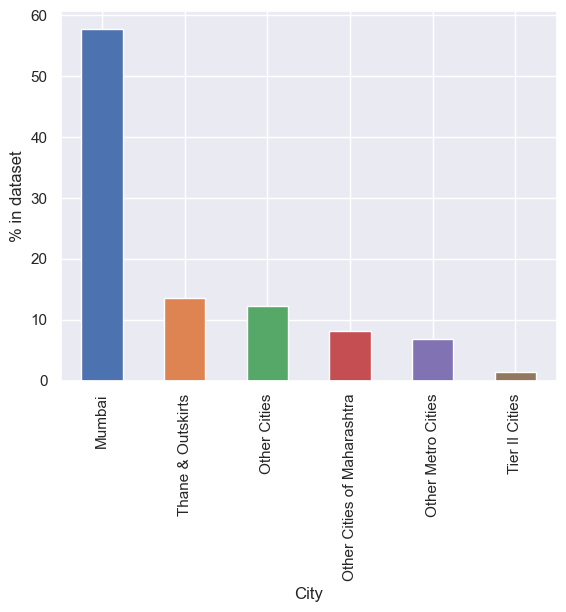

In [20]:
# Lets check for City
plot_percent('City')

Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [21]:
leads.City = leads.City.replace(np.nan,'Mumbai')

In [22]:
leads['Lead Quality'].value_counts(normalize = True, dropna = False) * 100

NaN                  51.590909
Might be             16.883117
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

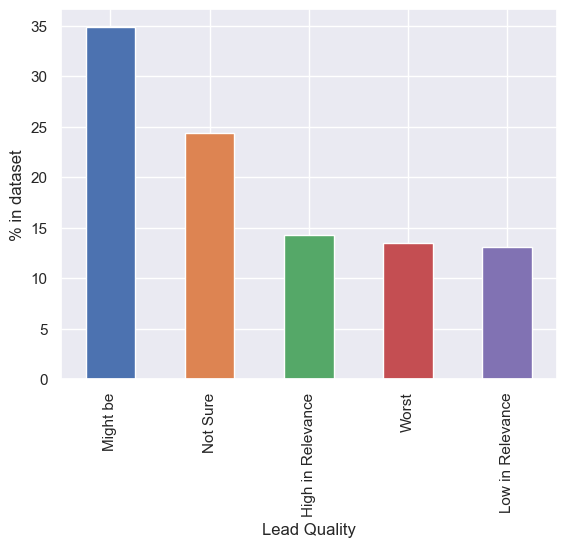

In [23]:
# For Lead Quality
plot_percent('Lead Quality')

We can replace the missing values in the 'Lead Quality' column with 'Not Sure,' assuming that the absence of a response indicates uncertainty.

In [24]:
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')

In [25]:
# checking Asymmetrique columns

In [26]:
asym_Index_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']
asym_Score_list = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score']

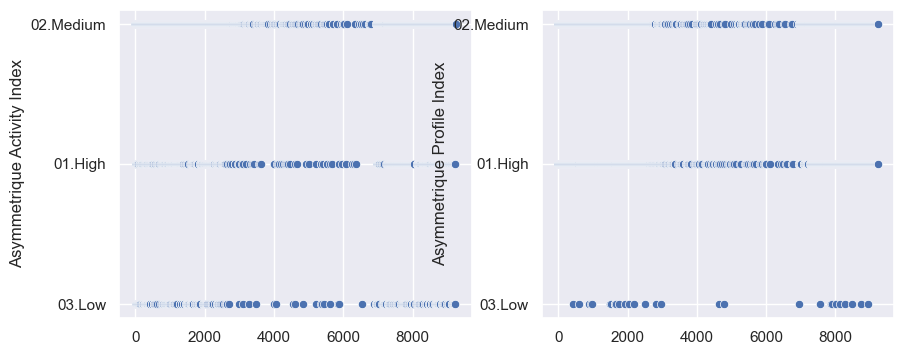

In [27]:
# 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for ax, var in zip(axes.flatten(), asym_Index_list):
    sns.scatterplot(leads[var], ax=ax)

plt.show()

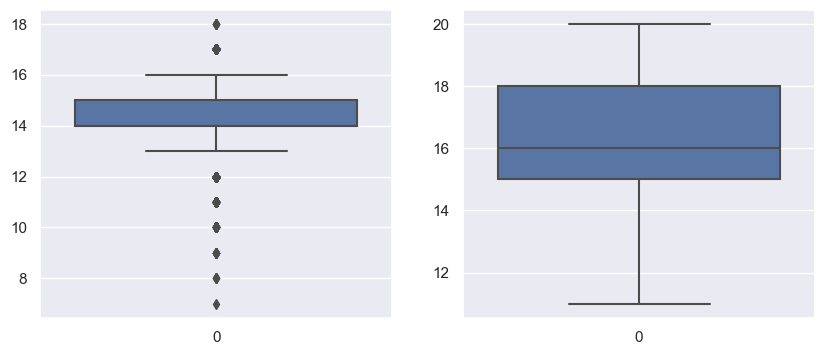

In [28]:
# For  'Asymmetrique Activity Score', 'Asymmetrique Profile Score'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for ax, var in zip(axes.flatten(), asym_Score_list):
    sns.boxplot(leads[var], ax=ax)

plt.show()

In [29]:
asym_list = asym_Index_list + asym_Score_list

leads[asym_list].describe()


,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


In [30]:
count_null(leads[asym_list]).sort_values(ascending=True)

Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Score     45.65
dtype: float64

These four variables exhibit over 45% missing values, and their plots display considerable variation. Imputing such a high percentage of missing data is not advisable. Even if we use mean or median imputation for numerical variables, the imputed values are unlikely to contribute significantly to the model. Therefore, it is recommended to drop these variables.

In [31]:
leads = leads.drop(asym_list,1)

In [32]:
leads.shape

(9240, 30)

In [33]:
# checking the null columns of other columns

count_null(leads).sort_values(ascending = False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Lead Quality                                      0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [34]:
# checking 'Specialization'

leads['Specialization'].value_counts(normalize=True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

near to 36% of Null values are present, let handle this by ploting the percentage plot

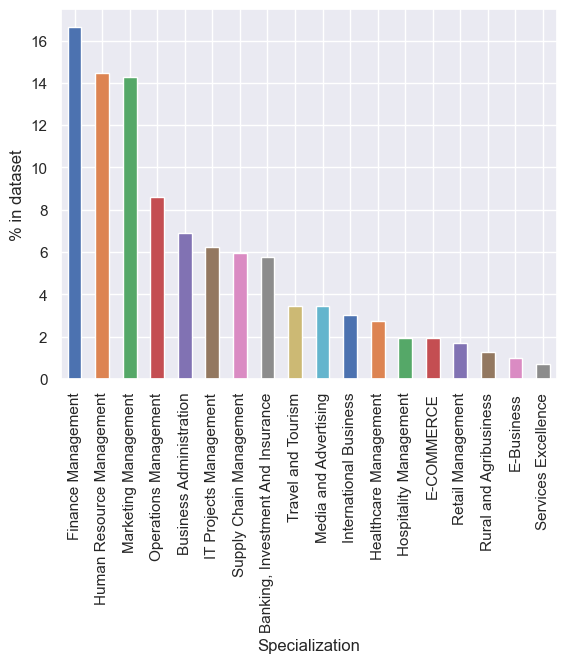

In [35]:
plot_percent('Specialization')

Due to numerous specializations, directly imputing with the mean isn't accurate. It's possible that a person has no specialization or their specialization isn't listed. A new column can be created for such cases.

In [36]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

Checking other columns and Replacing the most repeated value at NaN 

In [37]:
col = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

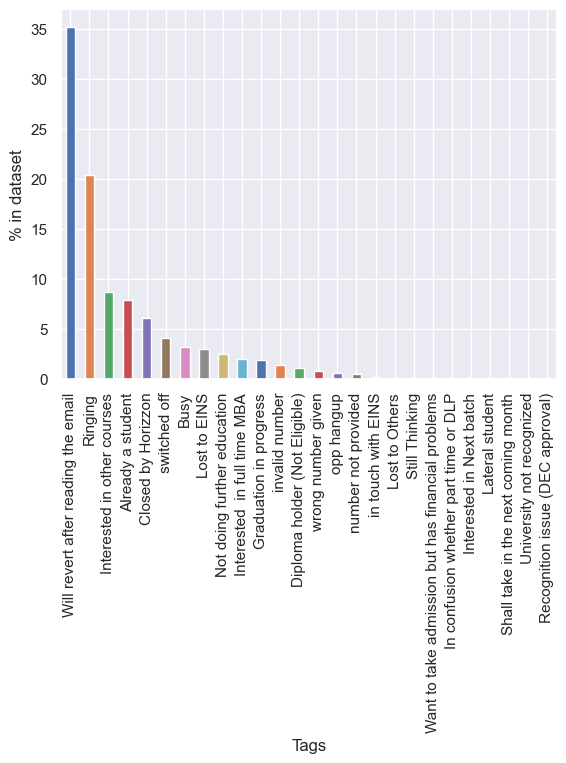

Most repeated value : -->  Will revert after reading the email
----------------------------------------------------------
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


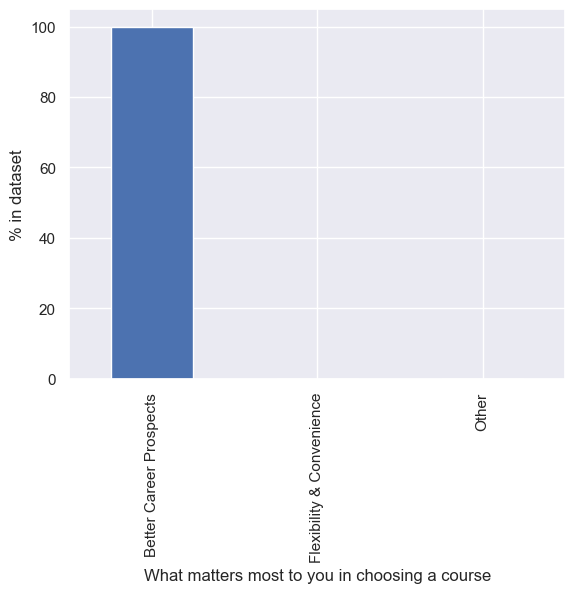

Most repeated value : -->  Better Career Prospects
----------------------------------------------------------
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


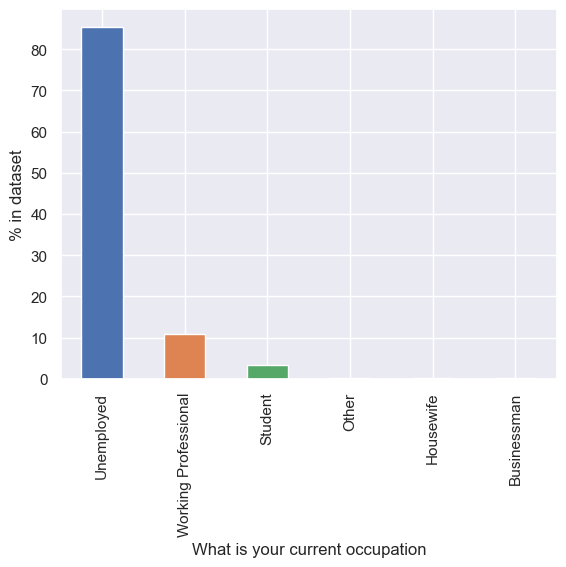

Most repeated value : -->  Unemployed
----------------------------------------------------------
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China              

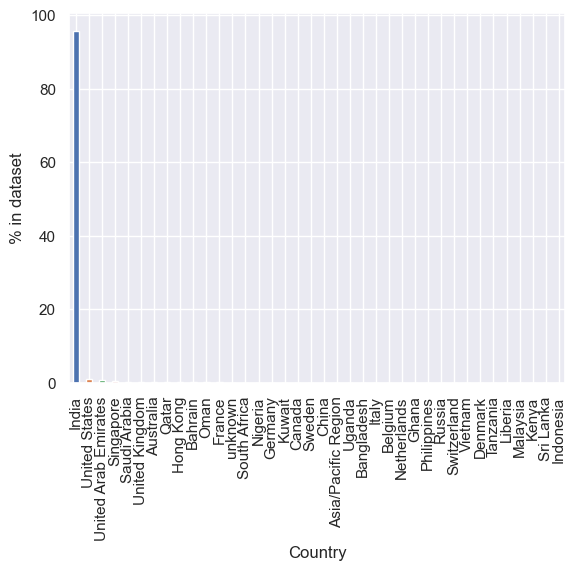

Most repeated value : -->  India
----------------------------------------------------------


In [38]:
for var in col:
    print('==========================================================')
    print(leads[var].value_counts(normalize=True, dropna = False) * 100)
    plot_percent(var)
    print('Most repeated value : --> ', leads[var].mode()[0])
    print('----------------------------------------------------------')
    leads[var] = leads[var].replace(np.nan, leads[var].mode()[0])


In [39]:
# check the any null values in the col

count_null(leads).sort_values(ascending = False)

Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Update me on Supply Chain Content                0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Tags                                             0.00
Lead Quality                                     0.00
Lead Number                                      0.00
X Education Forums                               0.00
Get updates on DM Content                        0.00
City                                             0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article           

In [40]:
leads[['Page Views Per Visit',  'TotalVisits', 'Last Activity','Lead Source']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Page Views Per Visit  9103 non-null   float64
 1   TotalVisits           9103 non-null   float64
 2   Last Activity         9137 non-null   object 
 3   Lead Source           9204 non-null   object 
dtypes: float64(2), object(2)
memory usage: 288.9+ KB


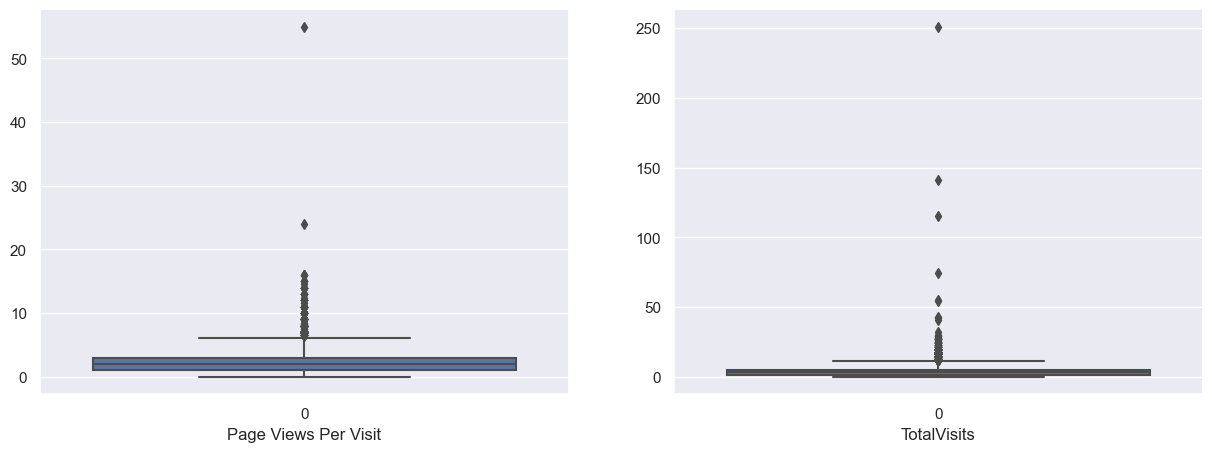

In [41]:
num_col = ['Page Views Per Visit', 'TotalVisits']

plt.figure(figsize=(15, 5))
for var in num_col:
    plt.subplot(1,2,num_col.index(var)+1)
    sns.boxplot(leads[var])
    plt.xlabel(var)

plt.show()

In [42]:
leads[num_col].describe()

,Page Views Per Visit,TotalVisits
count,9103.000000,9103.000000
mean,2.362820,3.445238
std,2.161418,4.854853
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.000000,5.000000
max,55.000000,251.000000


Based on the analysis, we observe significant variation in both variables. Since the percentage of missing values for both is below 2%, it is advisable to remove rows with missing values.

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64


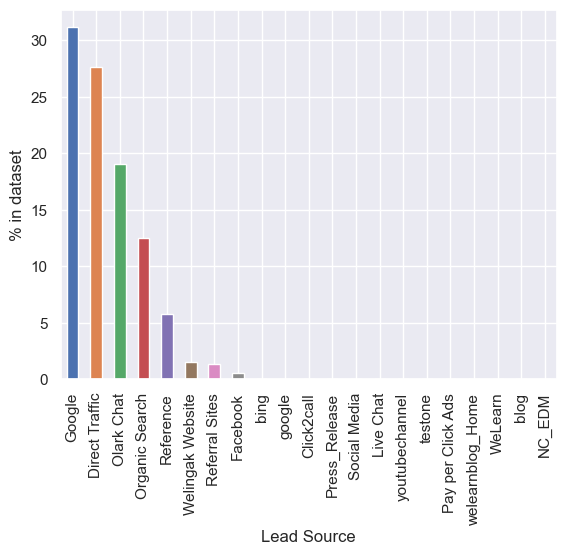

----------------------------------------------------------
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64


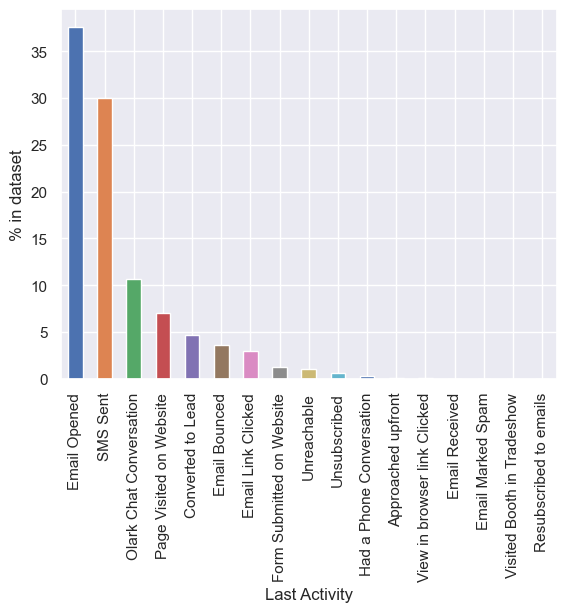

----------------------------------------------------------


In [43]:
cat_list = ['Lead Source', 'Last Activity']

for var in cat_list:
    print(leads[var].value_counts(normalize=True, dropna = False) * 100)
    plot_percent(var)
    print('----------------------------------------------------------')

For these categorical variables, filling with the most common value is not accurate since the next most frequent value has a similar occurrence. Moreover, since these variables have very few missing values, it's better to remove the rows with missing values. Therefore, we will drop rows with any missing values in the aforementioned four variables.

In [44]:
# To filter out rows without missing values
leads = leads.dropna()

In [45]:
count_null(leads)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

No missing values remain; the data has been successfully cleaned.

# Step 3: Exploratory Data Analysis 

### Visualising Target variable

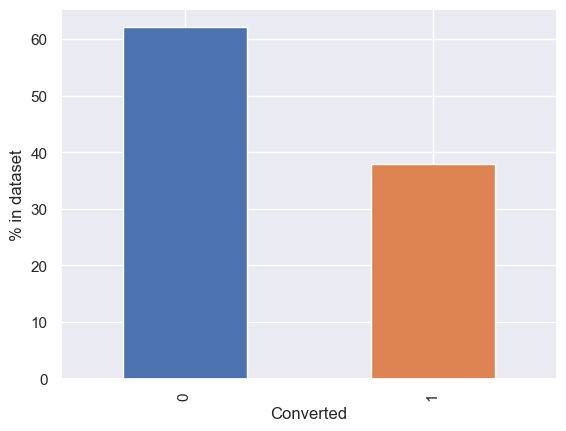

In [46]:
# For the target variable 'Converted'
plot_percent('Converted')


In [47]:
(sum(leads['Converted'])/len(leads['Converted'].index))*100


37.85541106458012

37.8% of the data in the 'Converted' column is labeled as 1, indicating that 37.8% of the leads are converted. This provides sufficient data for modeling.

### Visualising Categorical Variables

In [48]:
cat_col = list(leads.select_dtypes(include='object').columns)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [49]:
leads[cat_col].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [50]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def descriptive_cat_var_plot(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x=var, hue="Converted", data=leads)
    plt.title(f'Countplot of {var} with Conversion Information', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90)
    plt.legend(title='Conversion', loc='upper right', labels=['Not Converted', 'Converted'])
    plt.show()

# For Multiple plot
def descriptive_cat_vars_plots(variables_list):
    num_variables = len(variables_list)
    num_rows = int(num_variables / 2) + num_variables % 2
    plt.figure(figsize=(20, num_rows * 7))
    for index, var in enumerate(variables_list, start=1):
        plt.subplot(num_rows, 2, index)
        sns.countplot(x=var, hue="Converted", data=leads)
        plt.xticks(rotation=90)
    plt.suptitle('Countplots of Categorical Variables with Conversion Information', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


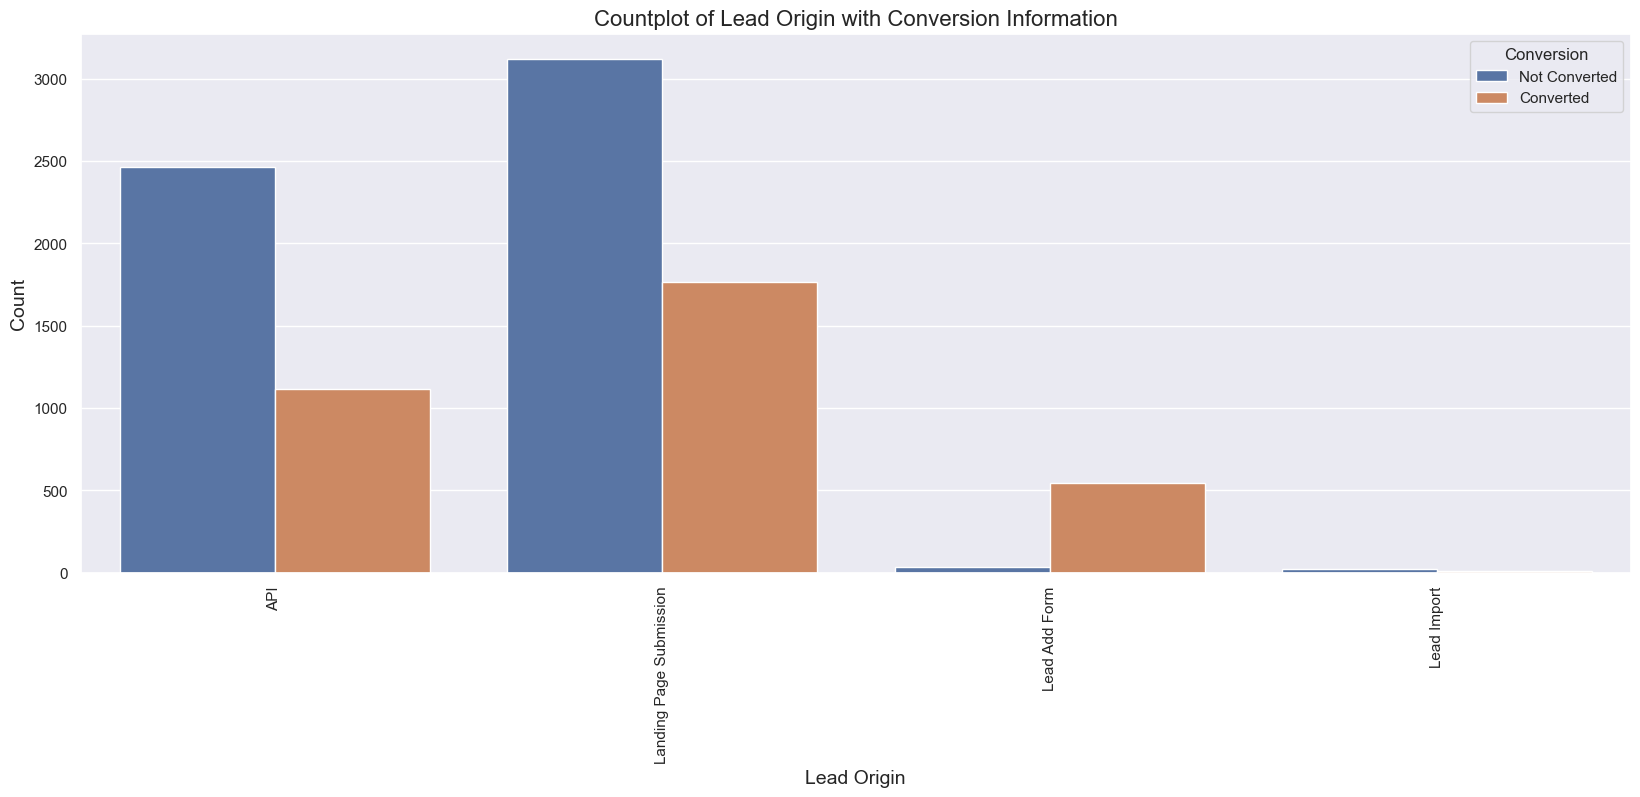

In [51]:
# visualizing Lead Origin
descriptive_cat_var_plot('Lead Origin')

**Insights on Lead Origin**:


- The **`API`** and **`Landing Page Submission`** channels generate the majority of leads but exhibit lower conversion rates, approximately around 30%. In contrast, **`Lead Add Form`** generates fewer leads but boasts a higher conversion rate. 

- To enhance overall performance, efforts should focus on improving the conversion rates for **`API`**- and **`Landing Page Submission`** , while also working on increasing lead generation through **`Lead Add Form`**.

- The **`Lead Import`** channel appears less significant in comparison.

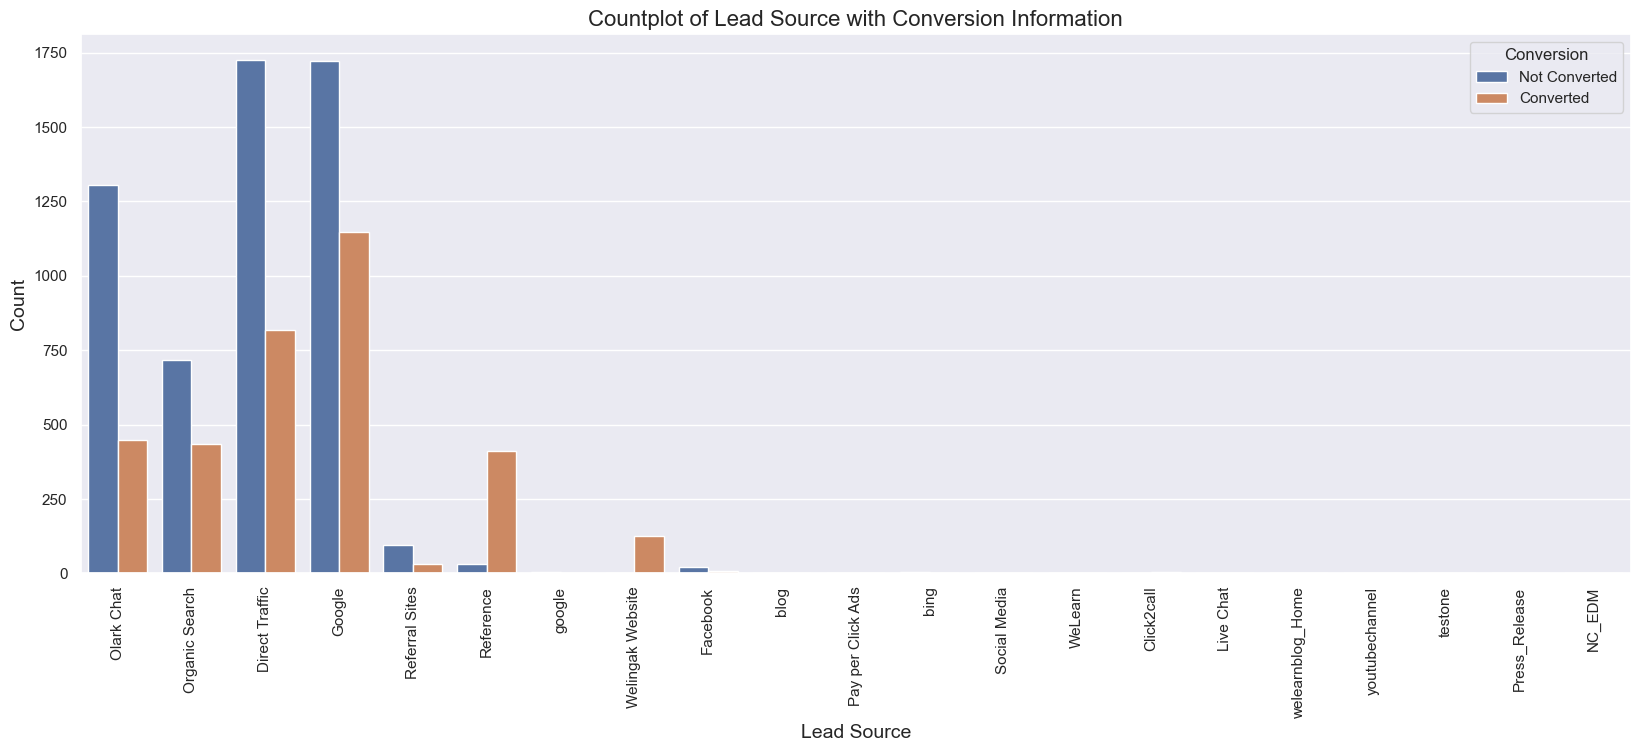

In [52]:
# visualizing 'Lead Source'
descriptive_cat_var_plot('Lead Source')

**Insights on Lead Source**:

- we observe spelling Error: the sourde are repeated as **`Google`** and **`google`**, need to change it to **`Google`**

- the plot shows most of the leads are generated by **`Google`** , followed by **`Direct Traffic`**, **`Olark Chat`** , While the highest conversion rates are observed through **`Reference`** and **`Welingak Website`** .

- The graph indicates that the number of leads generated by many sources is negligible, with a sufficient number up to **`Facebook`** . We can categorize all others into a single category called **`Others`**. 


In [53]:
# correcting spelling error
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [54]:
categories = leads['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [55]:
# To reduce categories
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','blog', 'Pay per Click Ads', 
                                                     'bing', 'Social Media', 'WeLearn', 'Click2call',
                                                     'Live Chat', 'welearnblog_Home', 'youtubechannel',
                                                     'testone', 'Press_Release', 'NC_EDM'], 'Others')

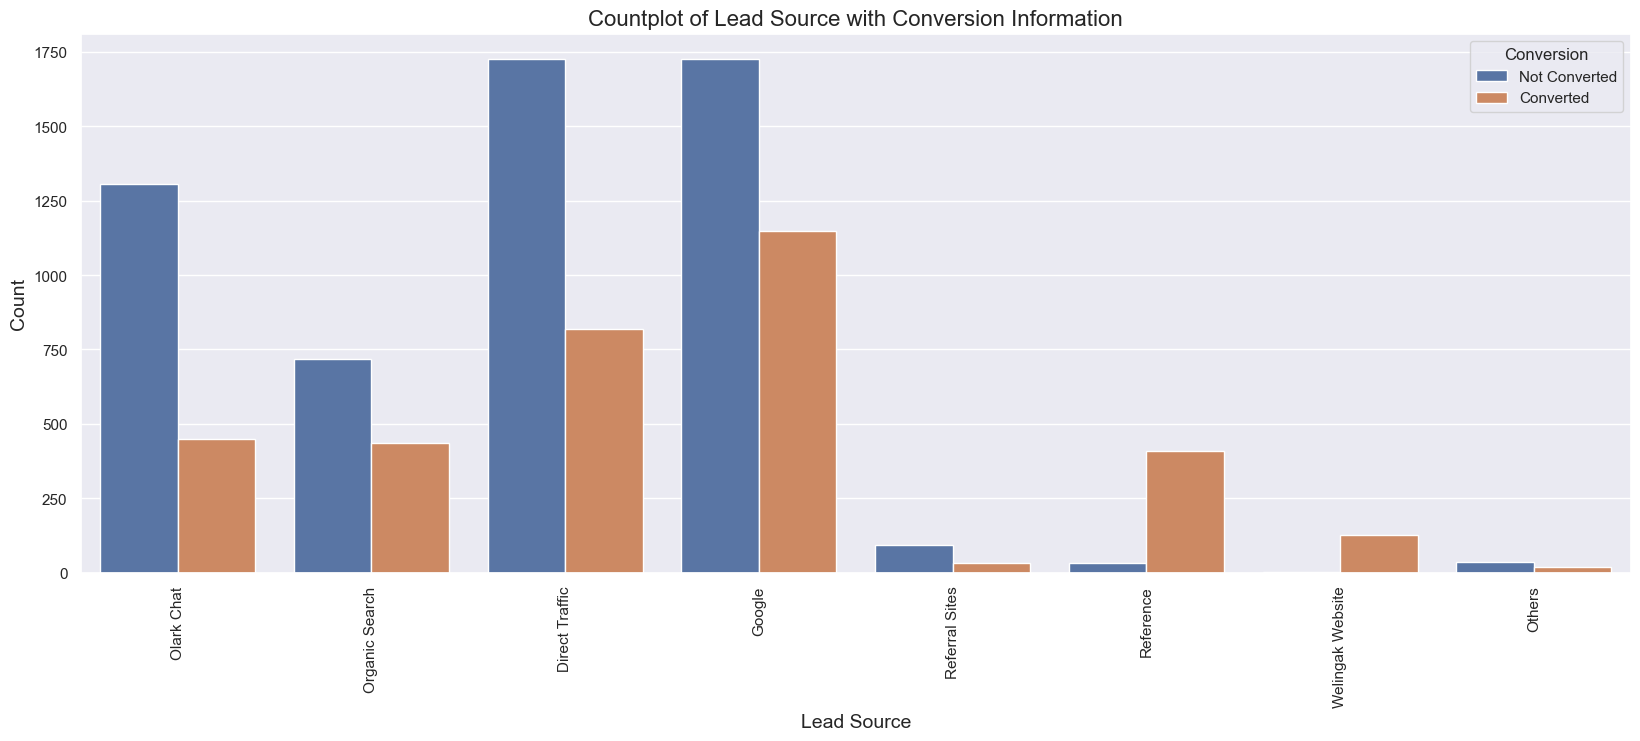

In [56]:
descriptive_cat_var_plot('Lead Source')

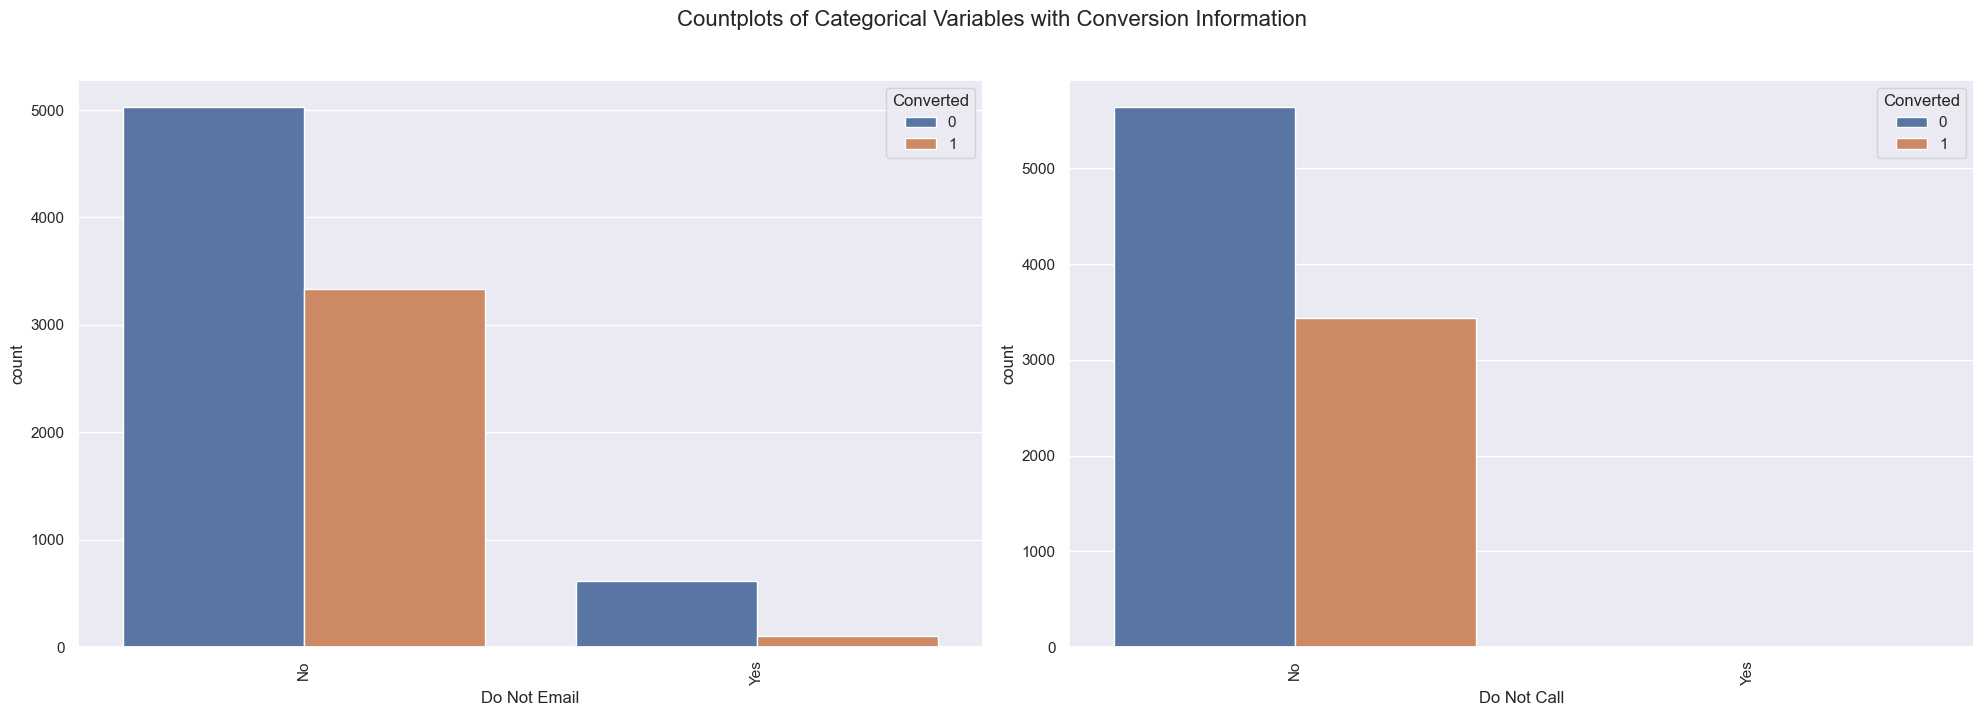

In [57]:
descriptive_cat_vars_plots(['Do Not Email', 'Do Not Call'])

Observations on **`Do Not Email`** and **`Do Not Call`** :

- As anticipated, the majority of responses are 'No' for both variables, which contributed to the generation of most leads.

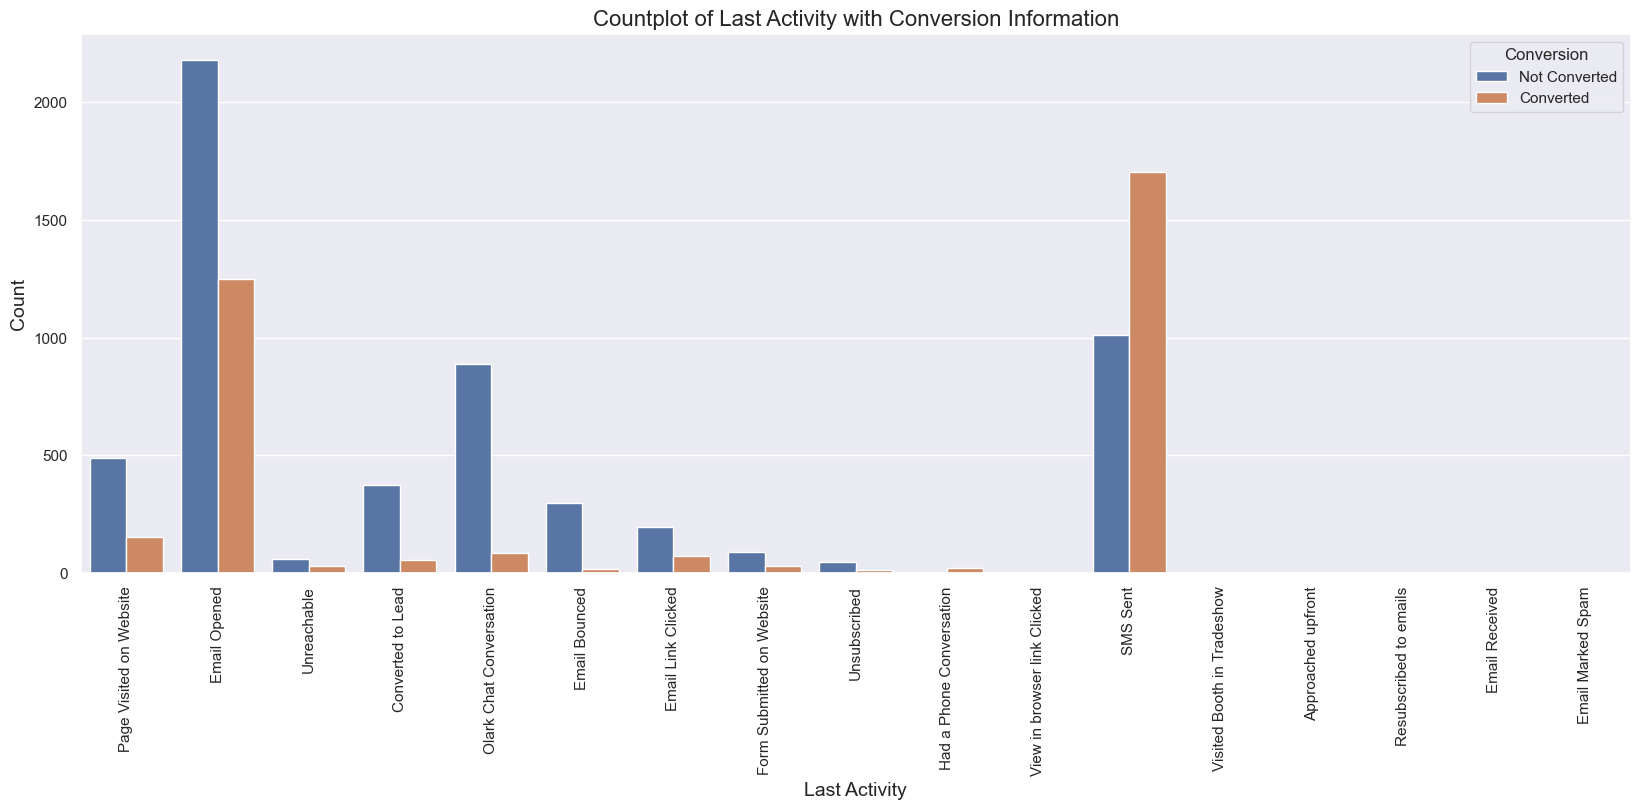

In [58]:
# visualizing 'Last Activity'
descriptive_cat_var_plot('Last Activity')

**Observations on Last Activity**:

The highest number of leads are generated when the last activity is **`Email Opened`**,' while the maximum conversion rate is observed for the **`SMS Sent`** activity, with a significantly high conversion rate. Categories following **`SMS Sent`** have almost negligible effects, so we can combine them into a single category.

In [59]:
categories = leads['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [60]:
# reduce categories
leads['Last Activity'] = leads['Last Activity'].replace(['Visited Booth in Tradeshow', 'Approached upfront',
                                                         'Resubscribed to emails', 'Email Received', 
                                                         'Email Marked Spam'], 'Others')

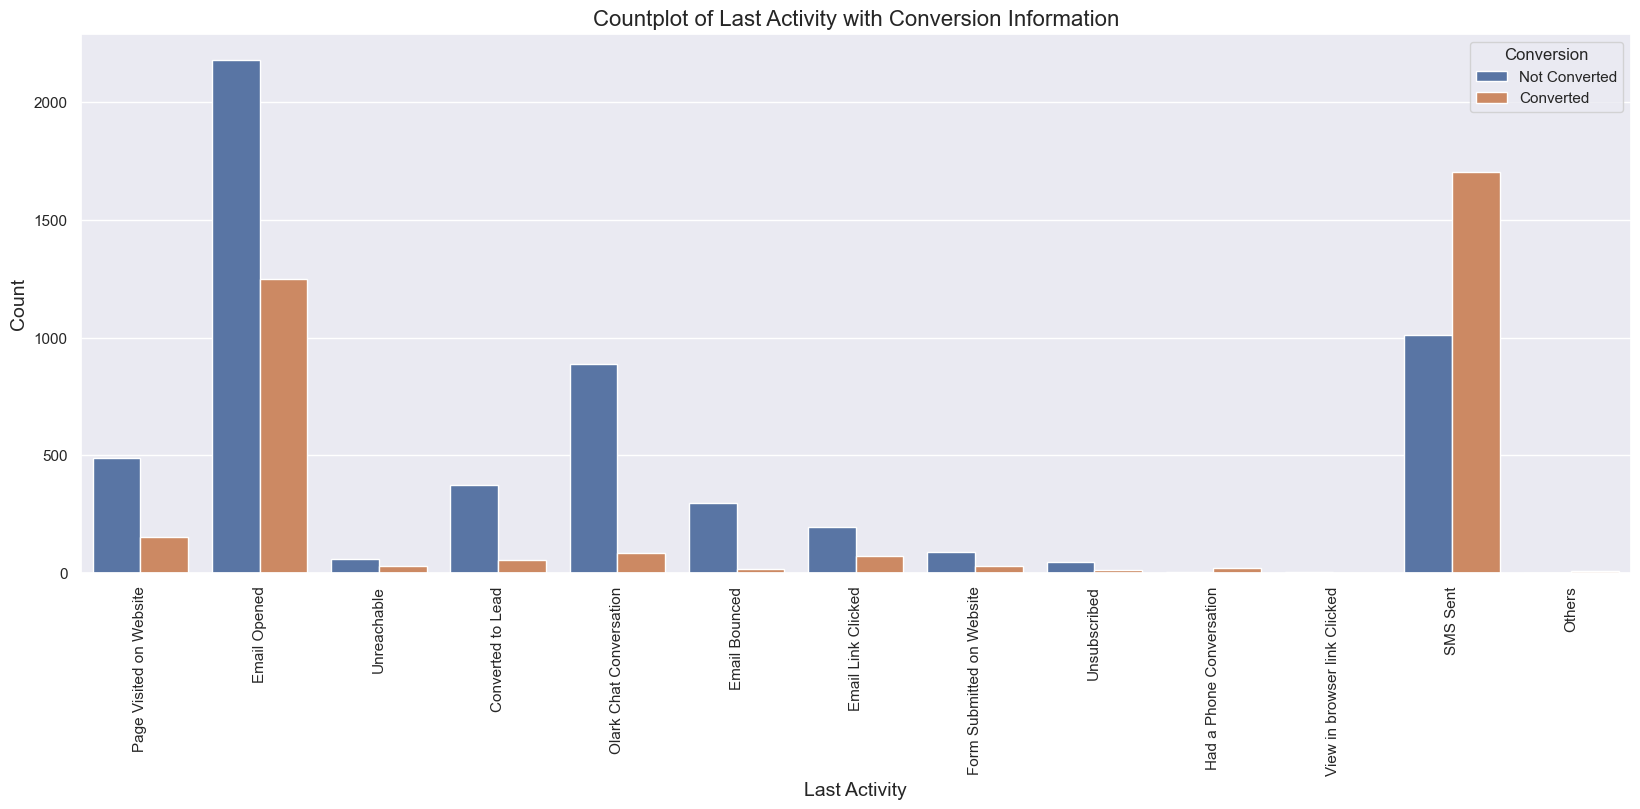

In [61]:
descriptive_cat_var_plot('Last Activity')

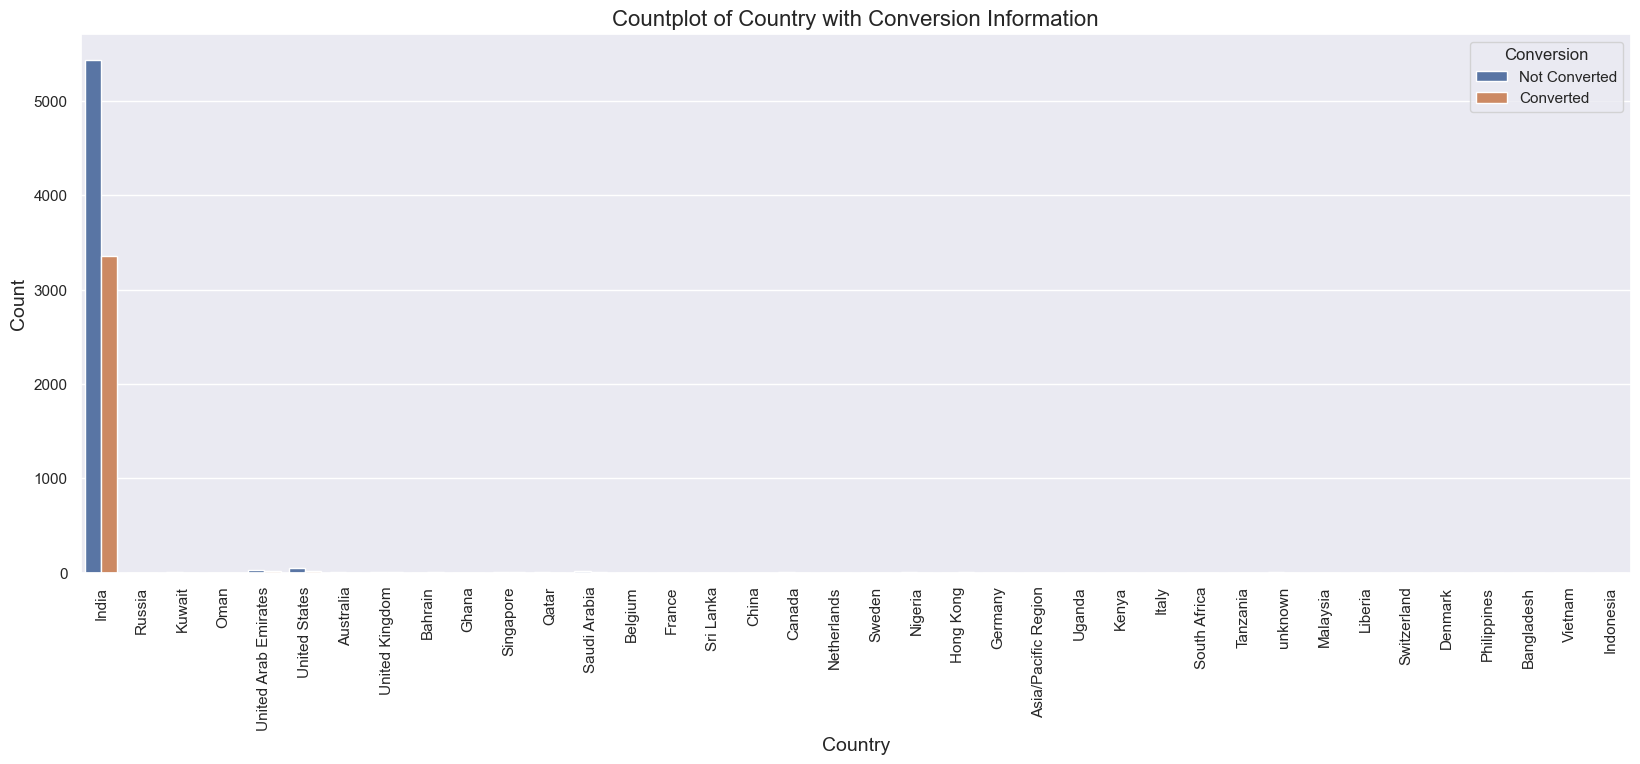

In [62]:
# visualizing 'Country'
descriptive_cat_var_plot( 'Country')

Observations for **`Country`** :

- we could see that Most of the responses are for India. Others are not significant.

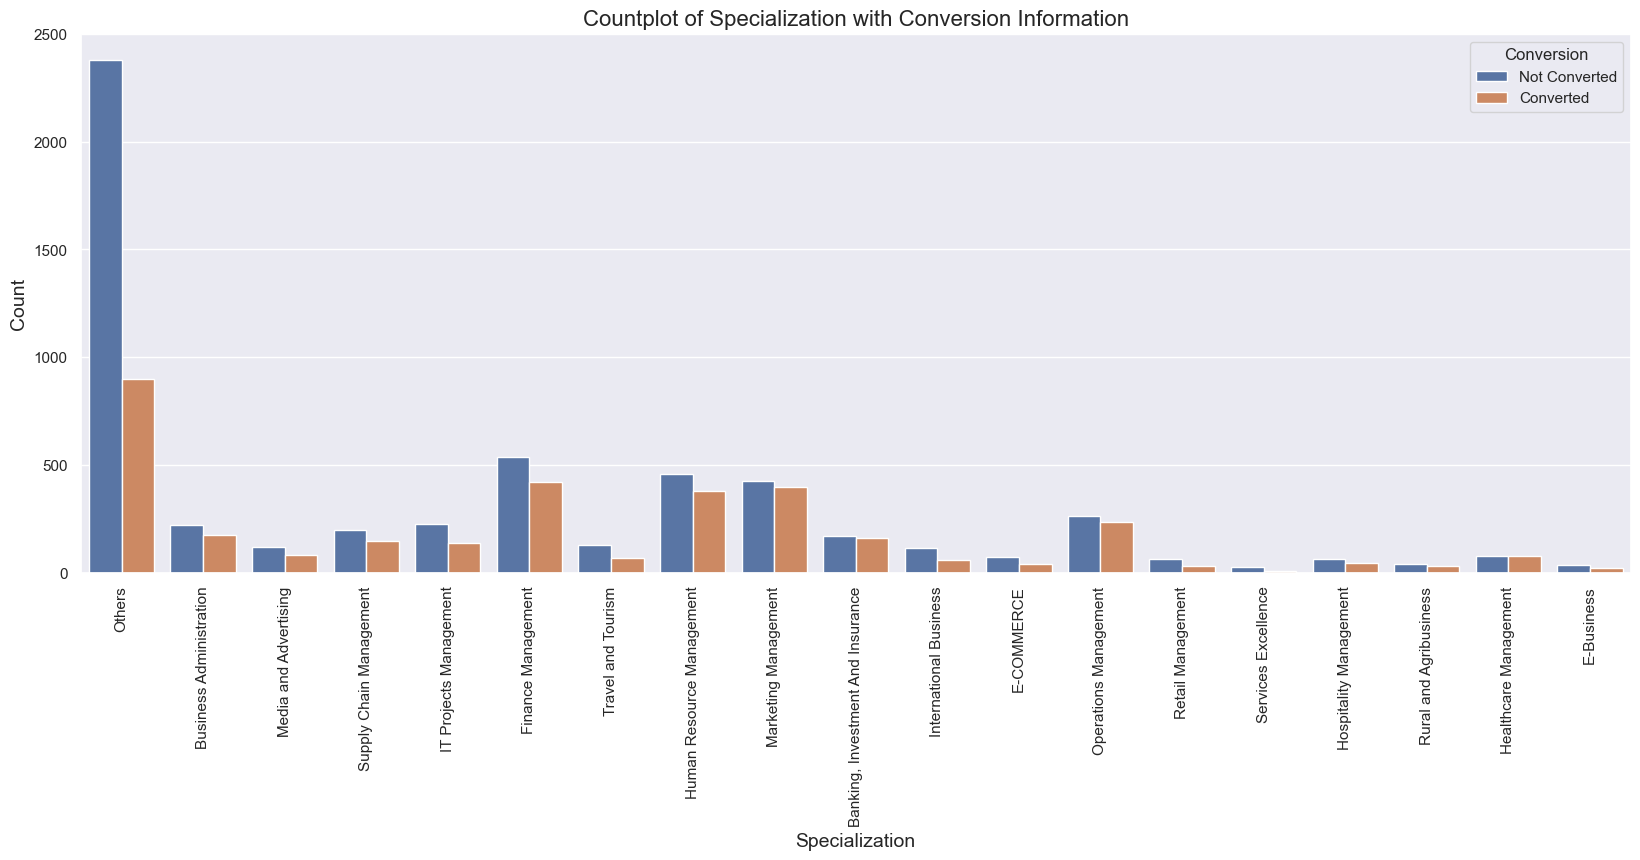

In [63]:
# visualizing 'Specialization'
descriptive_cat_var_plot( 'Specialization')

Observations on Specialization:

- Conversion rates remain relatively consistent across various **`specializations`**.

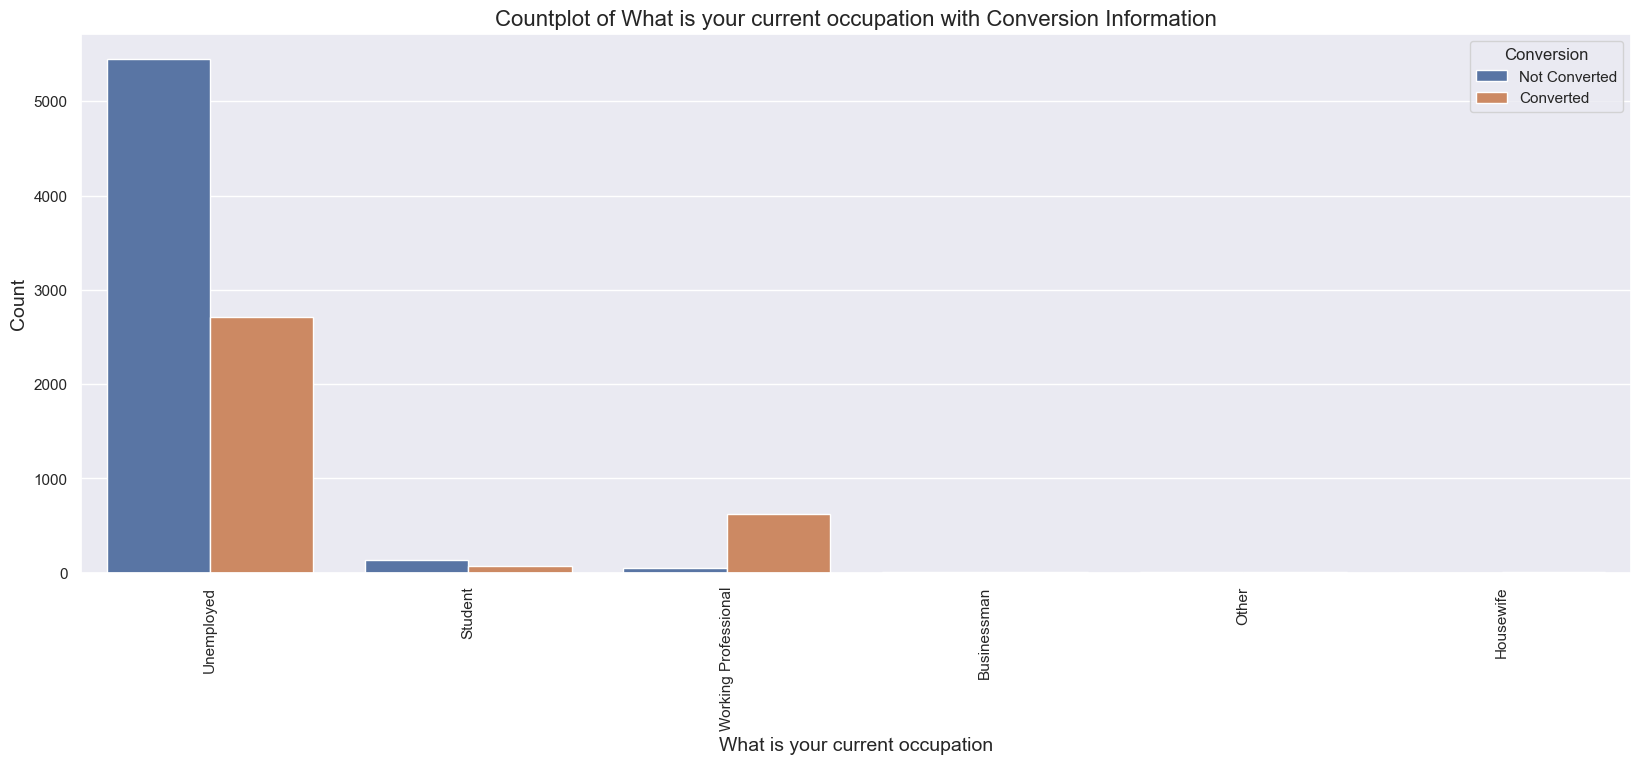

In [64]:
# visualizing  'What is your current occupation',

descriptive_cat_var_plot('What is your current occupation')

Observations for `What is your current occupation` :

- The highest conversion rate is observed among **`Working Professional`**. Although a high number of leads are generated from the  **`Unemployed`** category, the conversion rate is low.

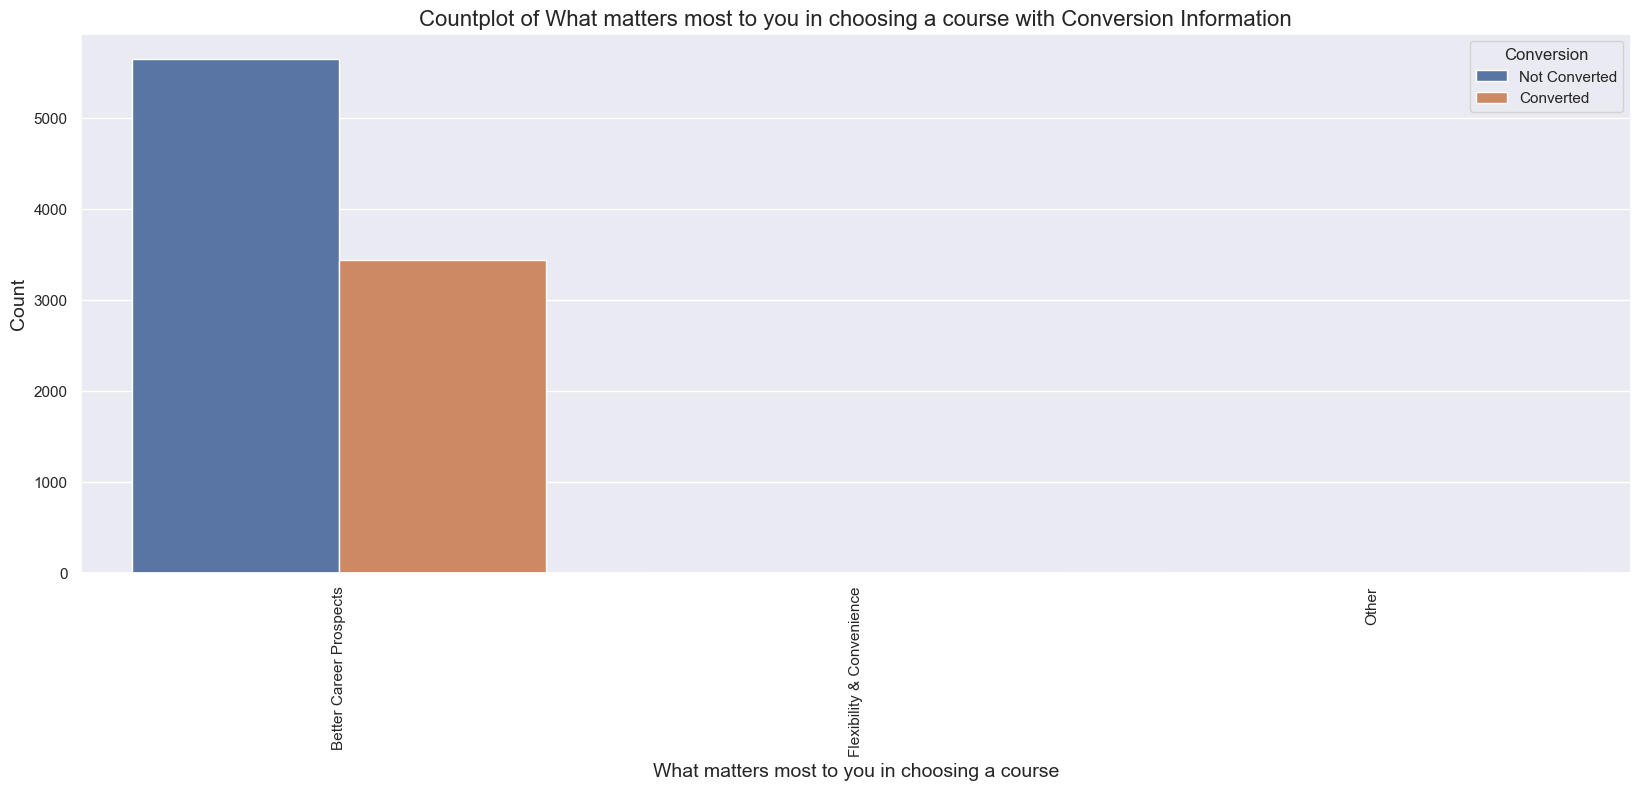

In [65]:
# visualizing  'What matters most to you in choosing a course'
descriptive_cat_var_plot( 'What matters most to you in choosing a course')

- The variable **`What matters most to you in choosing a course`** has only one category with a substantial count.

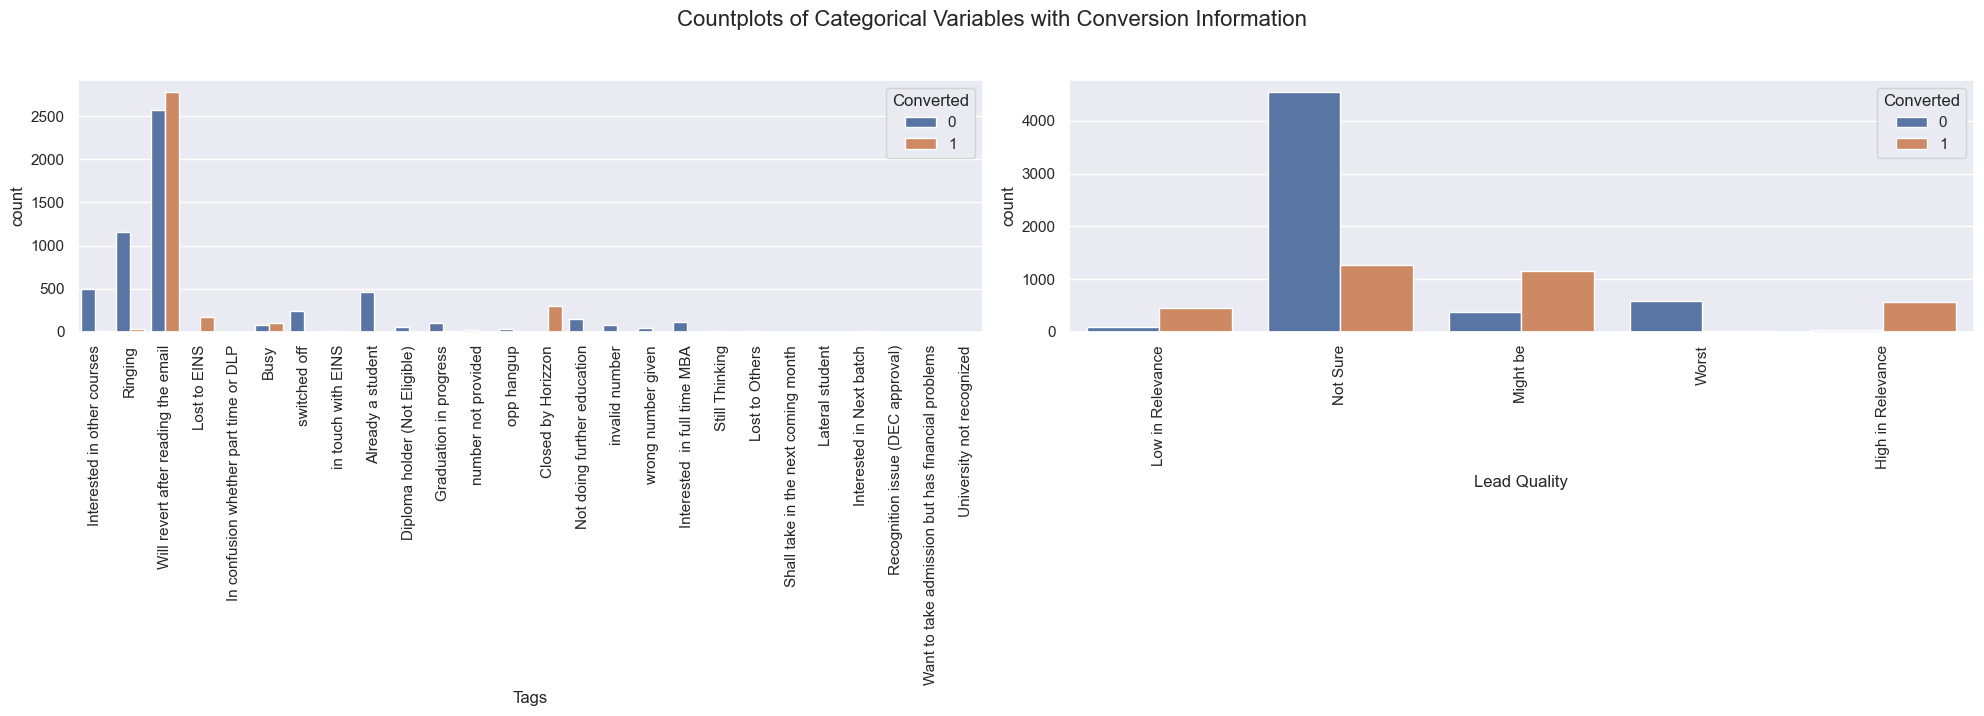

In [66]:
# visualizing  'Tags', 'Lead Quality'

descriptive_cat_vars_plots(['Tags', 'Lead Quality'])

Observations for Tags and Lead Quality:

- Tags: Categories after **`Interested in full-time MBA`** have minimal leads generated, so they can be combined into a single category. The tag **`Will revert after reading the email`** contributes to the most leads generated and the highest conversion rate.
- Lead Quality: As expected, **`Might be`** has the highest conversion rate, while **`Worst`** has the lowest.

In [67]:
categories = leads['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [68]:
# reduce categories
leads['Tags'] = leads['Tags'].replace(['Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], 'Others')

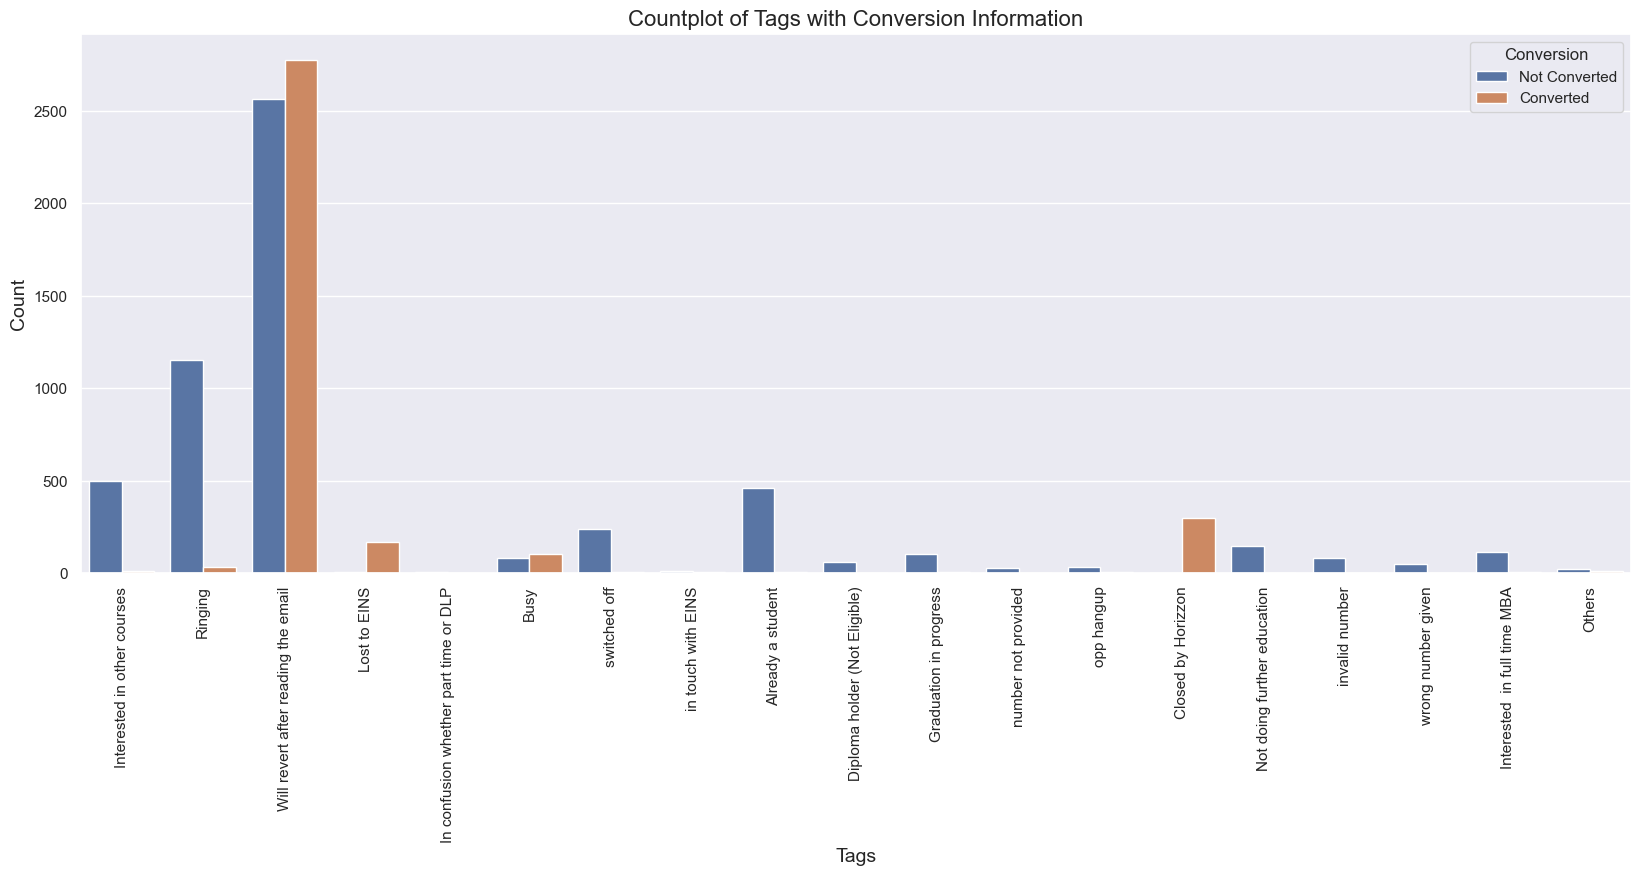

In [69]:
descriptive_cat_var_plot('Tags')

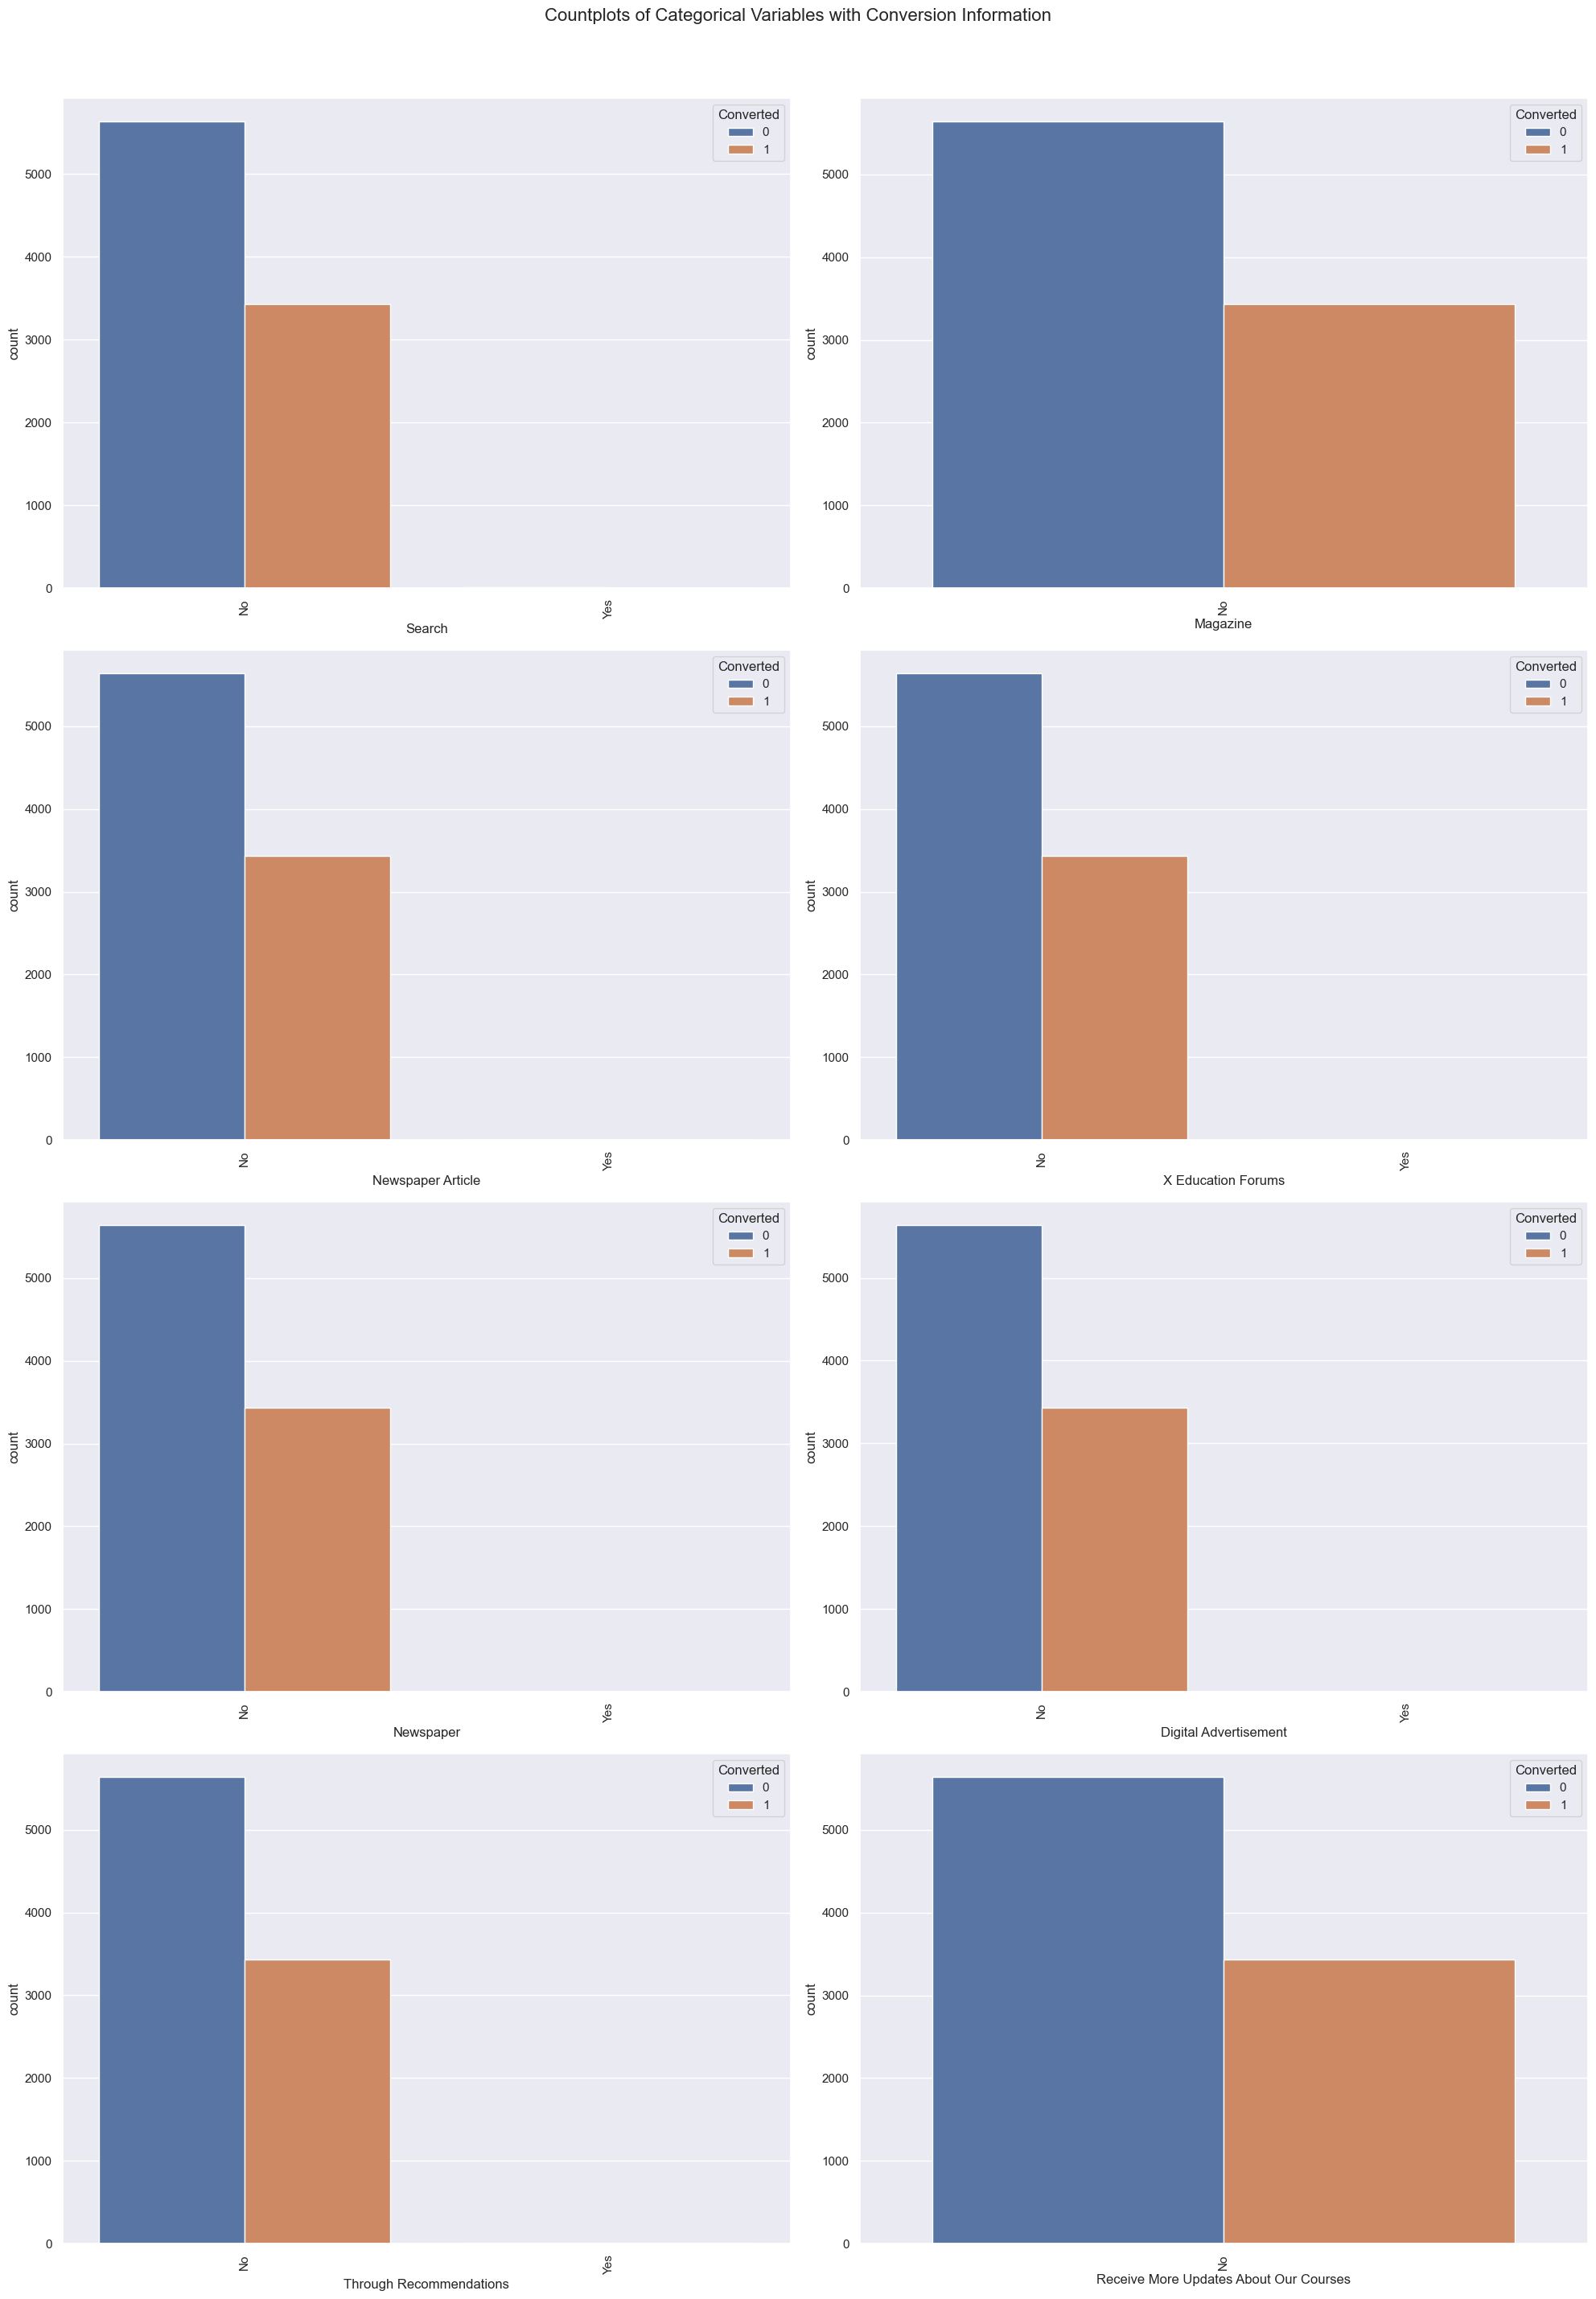

In [70]:
# visualizing 
descriptive_cat_vars_plots(['Search', 'Magazine',  'Newspaper Article', 
                            'X Education Forums',  'Newspaper', 'Digital Advertisement',
                            'Through Recommendations', 'Receive More Updates About Our Courses'])

Observations for **`Search`**, **`Magazine`**, **`Newspaper Article`**, **`X Education Forums`**, **`Newspaper`**, **`Digital Advertisement`**, **`Through Recommendations`**, and **`Receive More Updates About Our Courses`**:


- Since the majority of values for these variables are 'No,' no significant insights can be drawn from these plots.

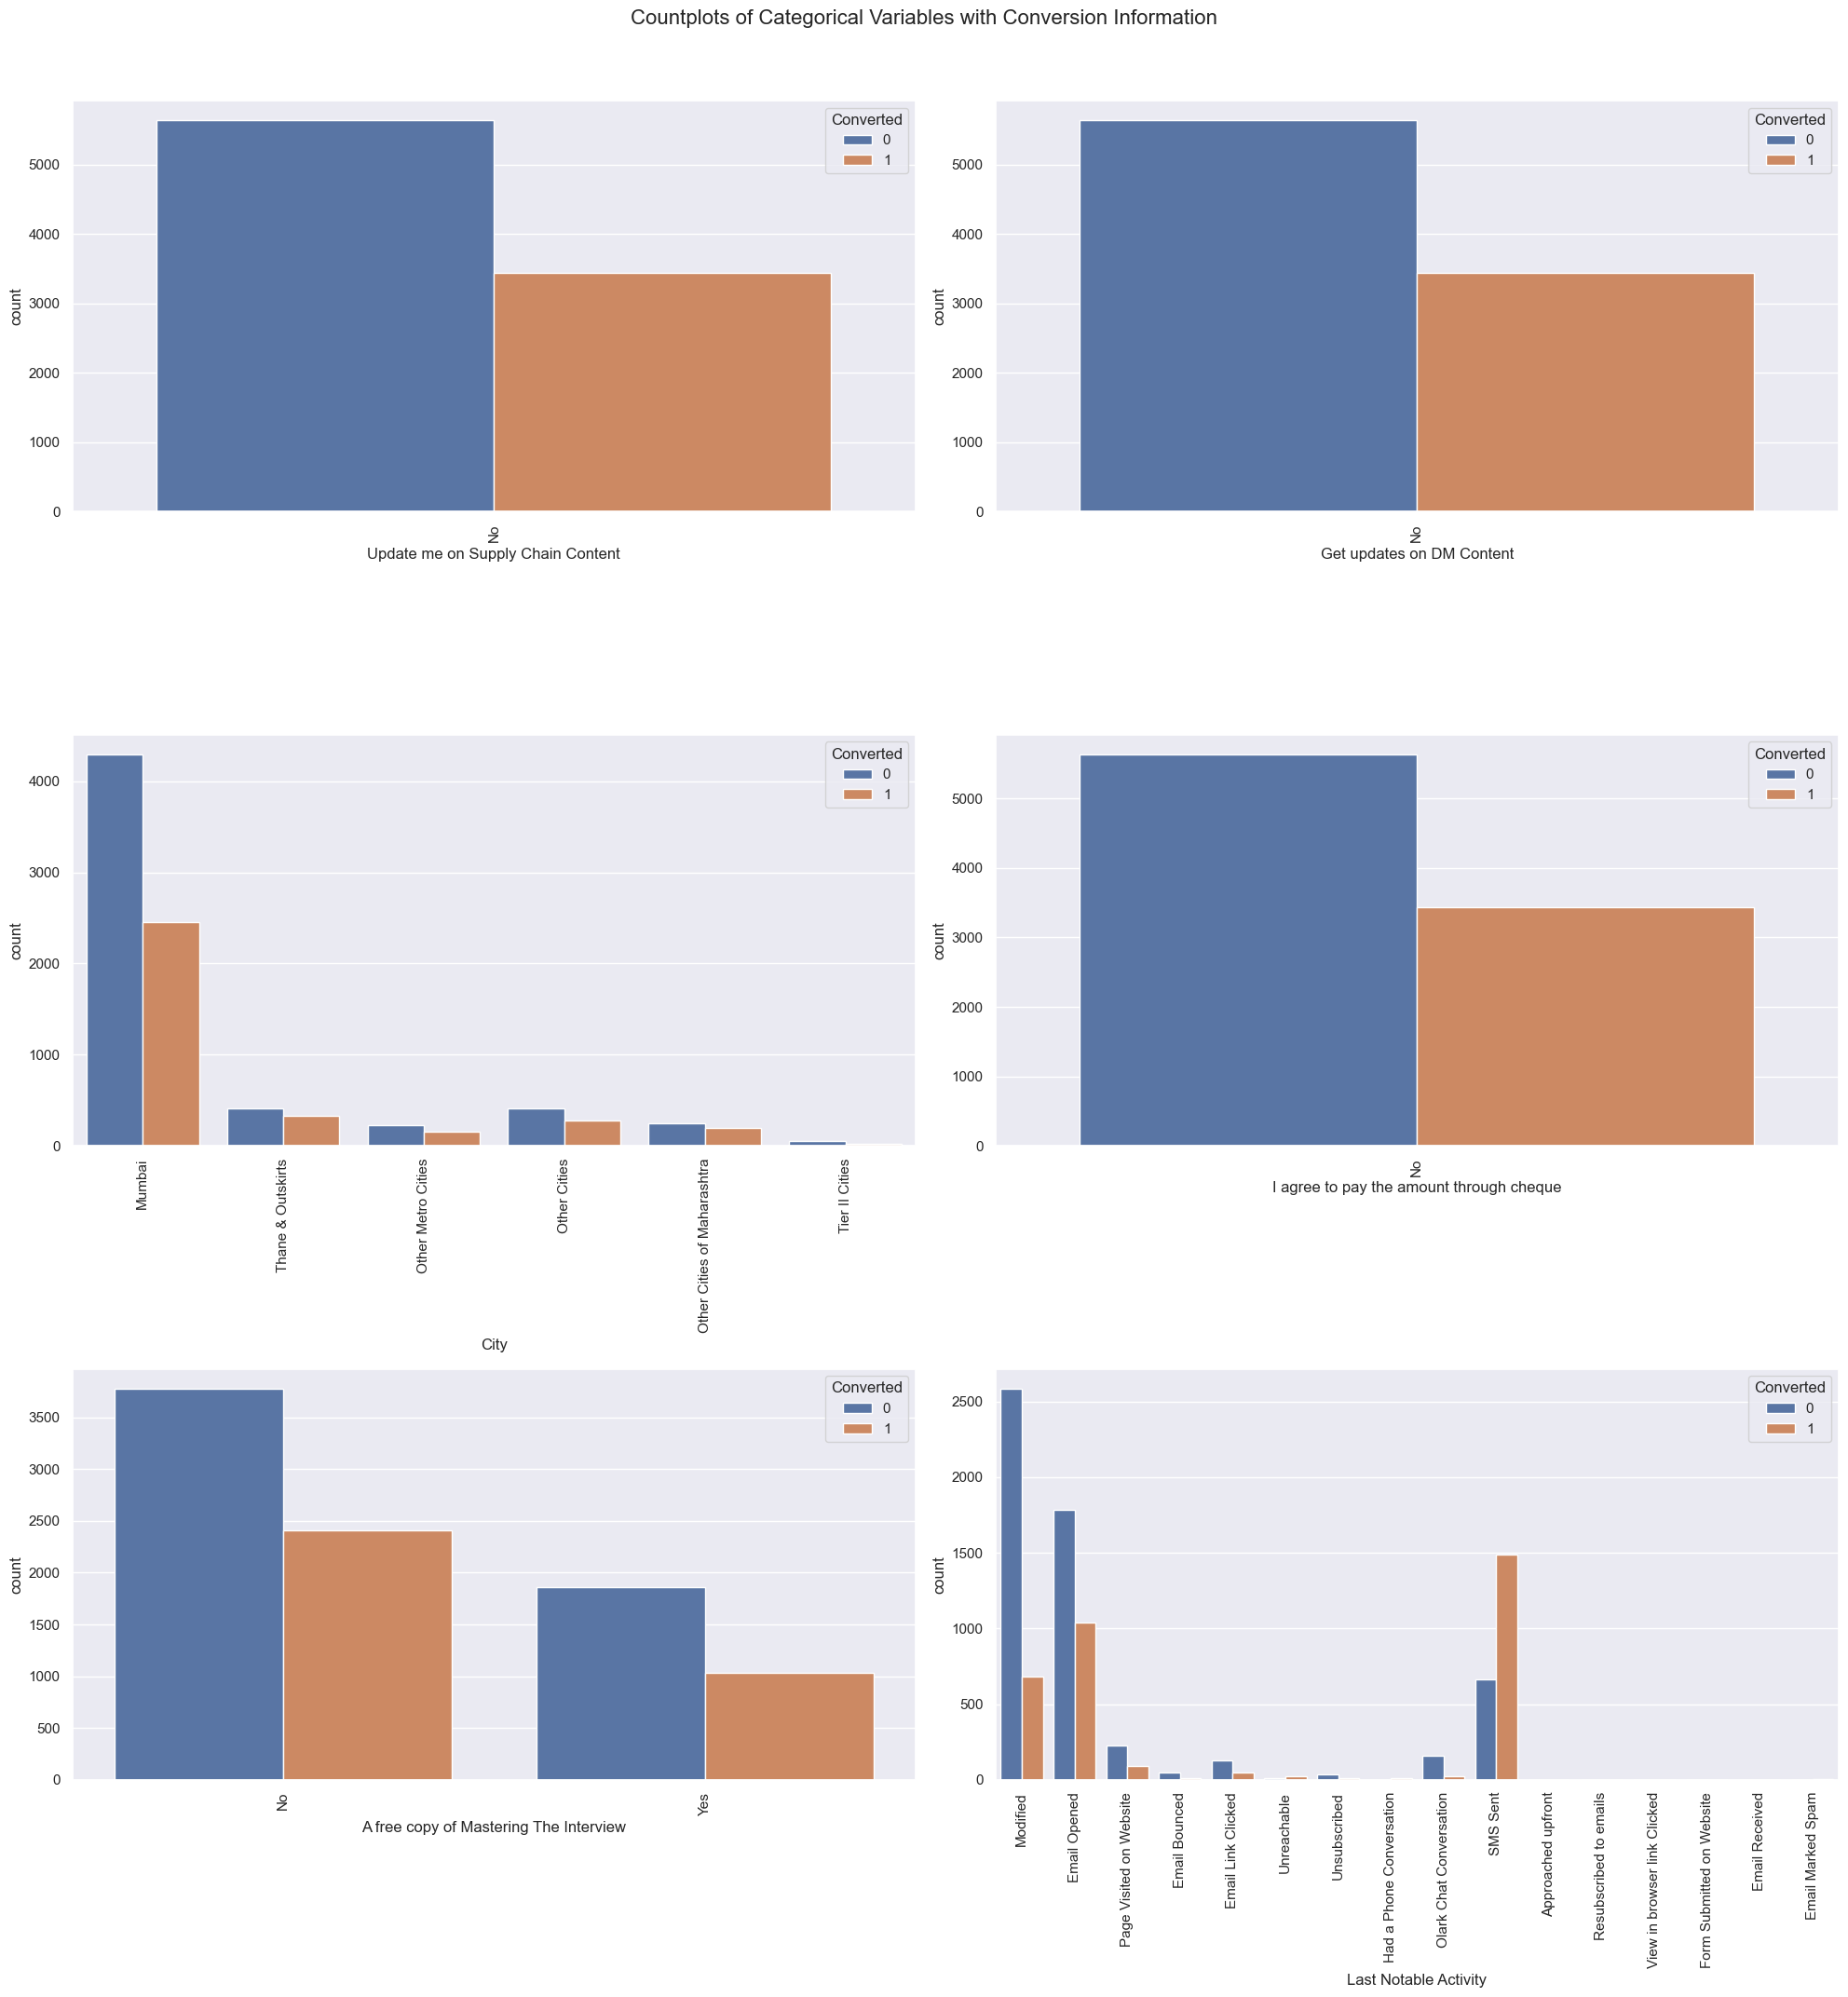

In [71]:
# visualizing remaining columns

descriptive_cat_vars_plots([ 'Update me on Supply Chain Content', 'Get updates on DM Content', 
                            'City', 'I agree to pay the amount through cheque', 
                            'A free copy of Mastering The Interview', 'Last Notable Activity'])

Observations for **`Update me on Supply Chain Content`**, **`Get updates on DM Content`**, **`City, I agree to pay the amount through cheque`**, **`A free copy of Mastering The Interview`**, and **`Last Notable Activity`**:

- Many of these variables are insignificant in analysis, with most having one significant category, 'NO.'
- In the **`City`**' variable, the majority of leads are generated for `Mumbai`
- For **`A free copy of Mastering The Interview`**,both categories exhibit similar conversion rates.
- In **`Last Notable Activity`** we can combine categories after `SMS Sent` similar to the variable **`Last Activity`**. It has the most generated leads for the category `Modified`, while the highest conversion rate is associated with the `SMS Sent` activity.

In [72]:
categories = leads['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [73]:
# To reduce categories
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 'Others')


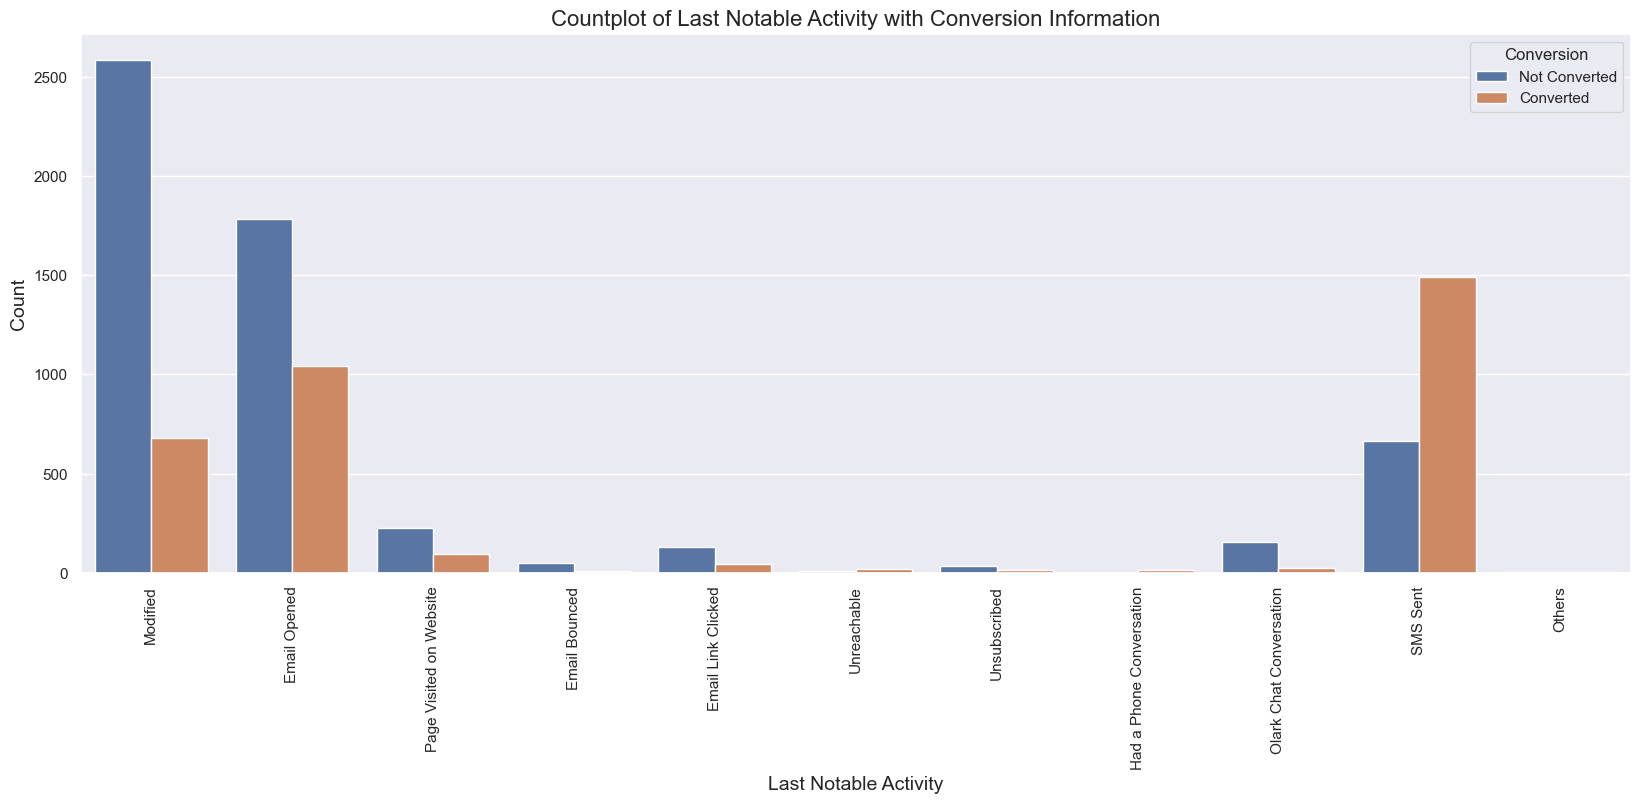

In [74]:
# leads['Last Notable Activity']
descriptive_cat_var_plot('Last Notable Activity')

### Visualising Numerical Variables and Outlier Treatment

In [75]:
list(leads.columns[leads.dtypes != 'object'])


['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

- we need to analys **`TotalVisits`**, **`Total Time Spent on Website`** and **`Page Views Per Visit`**

In [76]:
num_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

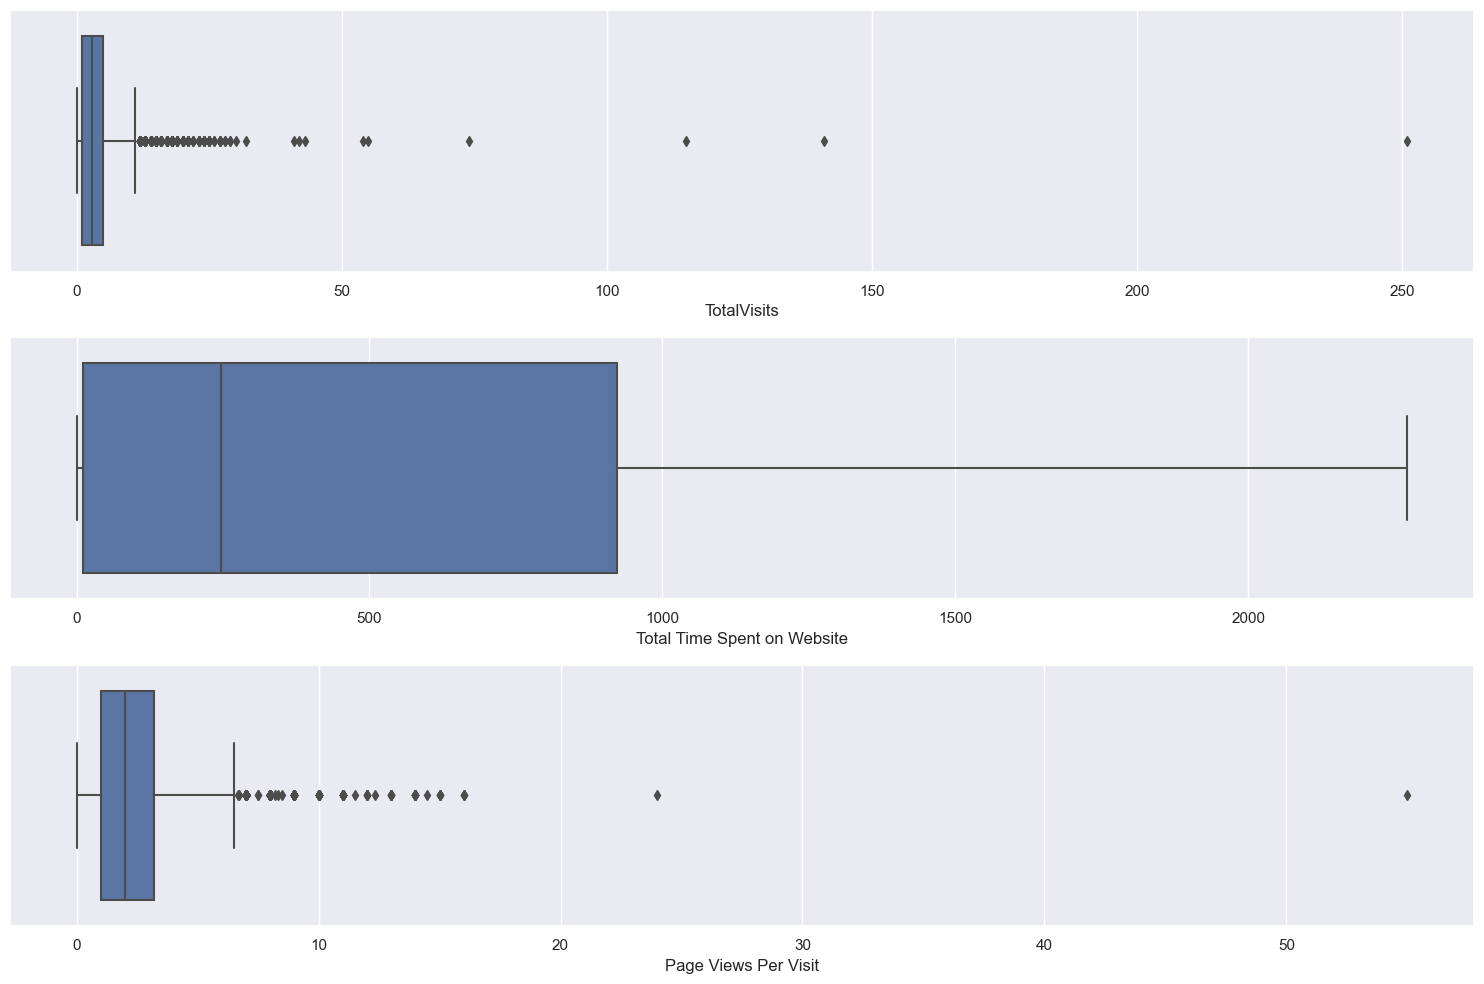

In [77]:
# ploting boxplot to check outliners Logic
fig, axes = plt.subplots(nrows=3, figsize=(15, 10))
for ax, var in zip(axes, num_col):
    sns.boxplot(x=leads[var], ax=ax)
plt.tight_layout()
plt.show()

In [78]:
leads[num_col].describe([0.05,.25, .5, .75, .90, .95,0.99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


From the boxplots, it's evident that outliers exist in the variables.

- **`TotalVisits`** : The 95th percentile is 10, while the maximum value is 251. Outliers should be capped at the 95th percentile.
- **`Total Time Spent on Website`** : No significant outliers observed.
- **`Page Views Per Visit`** : Similar to **`TotalVisits`**, outliers should be capped at the 95th percentile.

Capping at the 5th percentile is unnecessary, as the minimum values at the 5th percentile are consistent across all variables.

In [79]:
# Outlier treatment

percentile = leads['TotalVisits'].quantile([0.95]).values
leads['TotalVisits'][leads['TotalVisits'] >= percentile[0]] = percentile[0]


percentile = leads['Page Views Per Visit'].quantile([0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

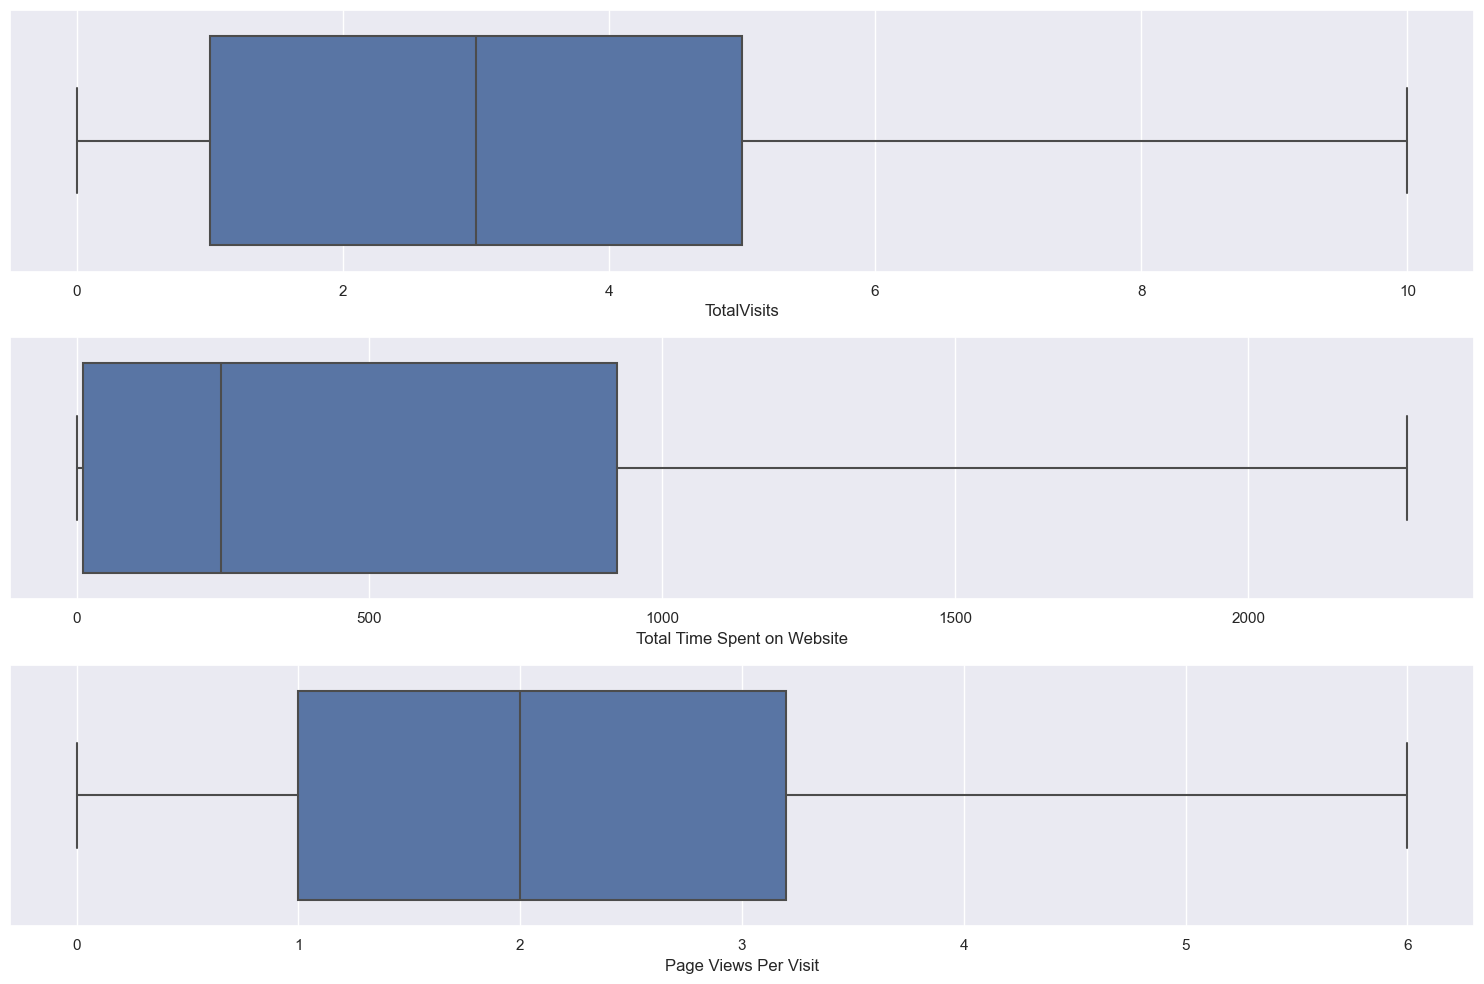

In [80]:
# check outerliner aftertreating
fig, axes = plt.subplots(nrows=3, figsize=(15, 10))
for ax, var in zip(axes, num_col):
    sns.boxplot(x=leads[var], ax=ax)
plt.tight_layout()
plt.show()

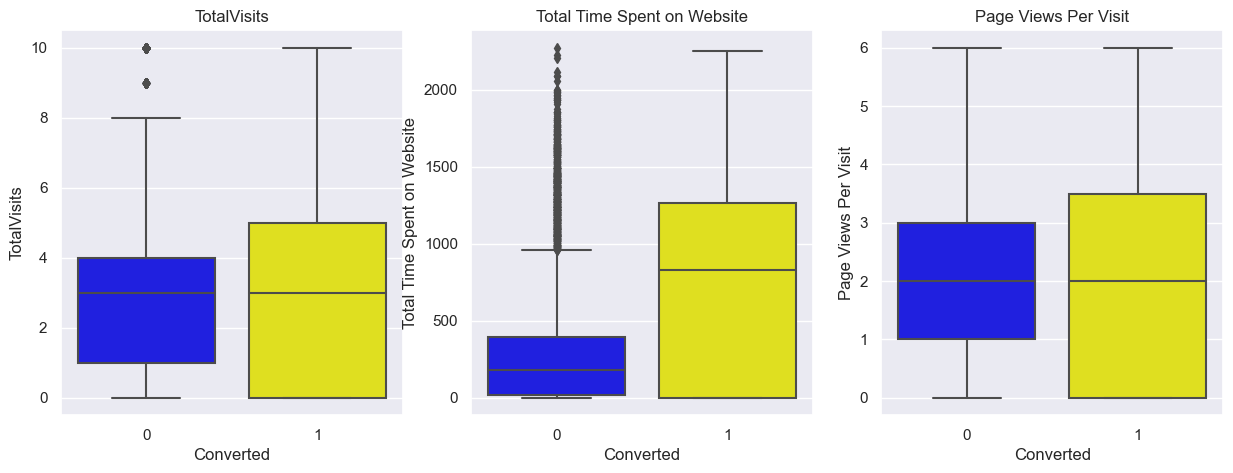

In [81]:
plt.figure(figsize=(15, 5))

for i, var in enumerate(num_col, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Converted', y=var, data=leads, palette=['#0000FF', '#FFFF00'])
    plt.title(var)

plt.show()


Observations:

- **`TotalVisits`** shows similar median values for both converted and non-converted leads, making it inconclusive.
- Leads spending more time on the website are more likely to convert, aligning with common knowledge.
- **`Page Views Per Visit`** exhibits similar median values for both converted and non-converted leads, providing inconclusive results.

According to the data visualization, we can eliminate variables that are not significant for analysis and do not contribute information to the model.

In [82]:
leads = leads.drop(['Lead Number','Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)

In [83]:
leads.shape

(9074, 14)

In [84]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [85]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

# Step 4: Data Preparation

In [86]:
# converting binary variable (Yes/No) to numerical variables 0/1
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})

In [87]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Creating dummy variables

In [88]:
# Categorical variables
cat_col = list(leads.select_dtypes(include='object').columns)
cat_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [89]:
leads.shape

(9074, 14)

In [90]:
# To create dummy variables and drop first ones
dummys = pd.get_dummies(leads[cat_col], drop_first=True)

# To add result to the original dataframe
leads = pd.concat([leads, dummys], axis=1)

# To drop the original variables
leads = leads.drop(cat_col,1)

In [91]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Train-Test Split


In [92]:
# Importing package
from sklearn.model_selection import train_test_split

In [93]:
leads.shape

(9074, 87)

In [94]:
# X variable  
X = leads.drop(['Converted'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [95]:
# y variable
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
# importing packages
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
scaler

StandardScaler()

In [99]:
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [100]:
X_train[num_col].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3009,-0.432779,-0.160255,-0.155018
1012,-0.432779,-0.540048,-0.155018
9226,-1.150329,-0.888650,-1.265540
4750,-0.432779,1.643304,-0.155018
7987,0.643547,2.017593,0.122613


In [101]:
# finding conversion rate
conversion_rate = (sum(leads['Converted'])/len(leads['Converted'].index)) * 100
print('conversion rate is = ',round(conversion_rate,3),'%')

conversion rate is =  37.855 %


Following the creation of dummy variables, we are left with a considerable number of features. It is advisable to initially employ Recursive Feature Elimination (RFE) for the purpose of feature reduction.

### Using RFE for Feature Selection

In [102]:
# creating an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [103]:
# importing packages
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [105]:
feature_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feature_ranking

[('Do Not Email', True, 1),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 64),
 ('Lead Source_Reference', False, 71),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 49),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Opened', False, 70),
 ('Last Activity_Form Submitted on Website', False, 72),
 ('Last Activity_Had a Phone Conversation', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Others', False, 34),
 ('Last Activity_Page Visited on Website', False, 40),
 ('Last Activity_SMS Sent', False, 8),
 ('Las

In [106]:
# selected Features 
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

# Step 5: Model Building

### Creating Function for Modeling with StatsModels and Sklearn

In [107]:
import statsmodels.api as sm

# Function for model Training
def model_build(X, y):
    X_sm = sm.add_constant(X)
    result = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()
    print(result.summary())
    return X_sm, result

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_in):
    X = X_in.drop('const',1)   
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)


In [109]:
# predict values on the train set

def get_predictions(X, logm, threshold=0.5):
    y_train_pred = logm.predict(X)
    y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred.values, 'Lead ID': y_train.index})
    y_train_pred_final['predicted'] = (y_train_pred_final['Converted_prob'] > threshold).astype(int)
    return y_train_pred_final


In [110]:
from sklearn import metrics

# create confusion matrix and check accuracy
def get_confusion_matrix(Converted, predicted):
    confusion_matrix = metrics.confusion_matrix(Converted, predicted)
    print("Confusion Matrix:")
    print(confusion_matrix)
    
    accuracy = metrics.accuracy_score(Converted, predicted)
    print("Training Accuracy:", accuracy)
    
    return confusion_matrix, accuracy


In [111]:
# Function for calculating metrics beyond accuracy
def calculate_other_metrics(confusion_matrix):
    TP = confusion_matrix[1, 1]    # True positives 
    TN = confusion_matrix[0, 0]    # True negatives
    FP = confusion_matrix[0, 1]    # False positives
    FN = confusion_matrix[1, 0]    # False negatives
    
    sensitivity = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    false_positive_rate = FP / float(TN + FP)
    positive_predictive_value = TP / float(TP + FP)
    negative_predictive_value = TN / float(TN + FN)
    
    print("Sensitivity:", round(sensitivity,2),'%')
    print("Specificity:", round(specificity,2),'%')
    print("False positive rate - predicting the lead conversion when the lead does not convert:", round(false_positive_rate,2),'%')
    print("PPV:", round(positive_predictive_value,2),'%')
    print("NPV:", round(negative_predictive_value,2),'%')

## Model 1

Executing the initial model using the features identified through Recursive Feature Elimination (RFE).

In [112]:
X_1, mod_1 = model_build(X_train[sel_col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.2
Date:                Mon, 18 Dec 2023   Deviance:                       3176.4
Time:                        00:58:37   Pearson chi2:                 3.57e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5652
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The feature **`Tags_number not provided`** exhibits a considerably high p-value. Hence, it is insignificant and can be dropped.

In [113]:
sel_col1 = sel_col.drop('Tags_invalid number',1)

## Model 2

In [114]:
X_2, mod_2 = model_build(X_train[sel_col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.2
Date:                Mon, 18 Dec 2023   Deviance:                       3190.4
Time:                        00:58:37   Pearson chi2:                 3.49e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5643
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [115]:
sel_col2 = sel_col1.drop('Tags_number not provided',1)

The variable **`Tags_number not provided`** demonstrates a p-value exceeding 0.05, indicating its insignificance and suggesting its removal.

## Model 3

In [116]:
X_3, mod_3 = model_build(X_train[sel_col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.7
Date:                Mon, 18 Dec 2023   Deviance:                       3197.4
Time:                        00:58:37   Pearson chi2:                 3.48e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5638
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The variable **`Tags_wrong number given`** exhibits a p-value exceeding 0.05, indicating its insignificance and suggesting its removal.

In [117]:
sel_col3 = sel_col2.drop('Tags_wrong number given',1)

## Model 4

In [118]:
X_4, mod_4 = model_build(X_train[sel_col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Mon, 18 Dec 2023   Deviance:                       3202.0
Time:                        00:58:37   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5635
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The p-values for all features are close to zero, 

suggesting their significance. Additionally, we need to examine the VIFs (Variance Inflation Factors) for potential multicollinearity.

In [119]:
# checking the VIF values

calculate_vif(X_4)

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


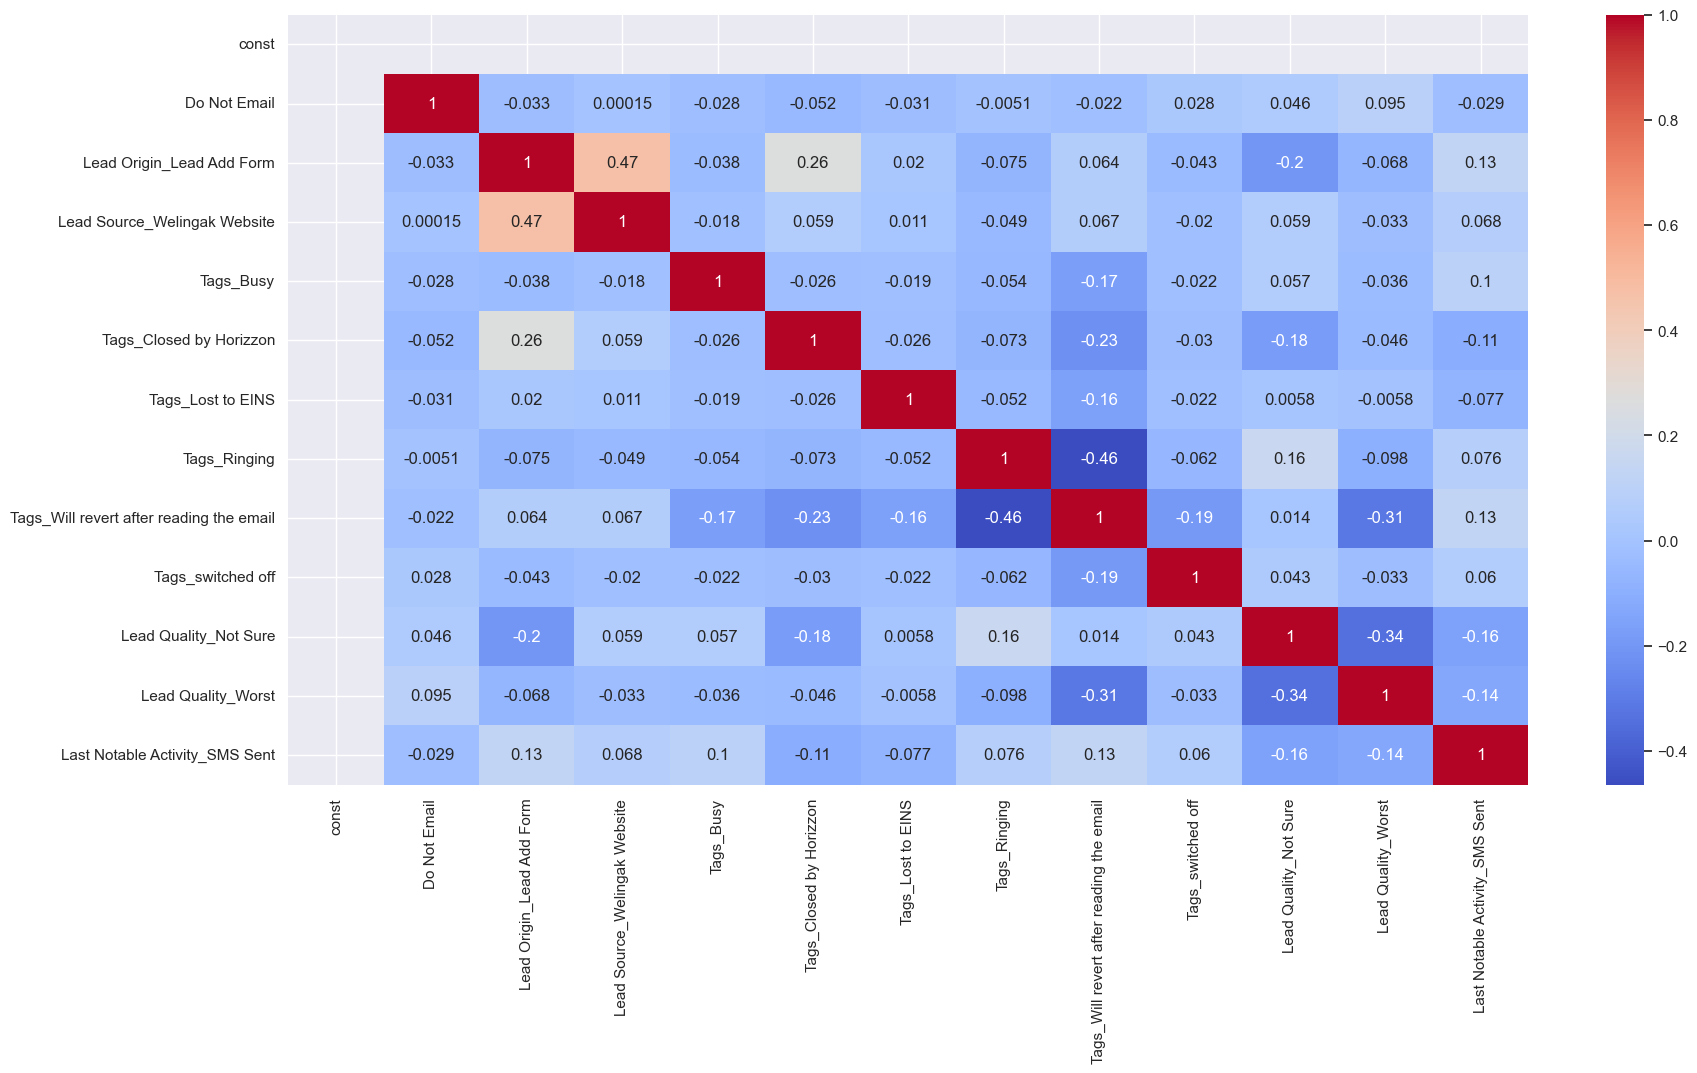

In [120]:
# Plotting correlations using a heatmap
plt.figure(figsize=(20, 10))
correlation_matrix = X_4.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.show()

The VIF values and heat maps indicate minimal multicollinearity. All variables have acceptable VIF values, suggesting their importance from a business perspective. Thus, no further variable elimination is necessary, and we can proceed with predictions using this model.

In [121]:
# To get predicted values on train set
y_train_pred_final = get_predictions(X_4,mod_4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


In [122]:
# get Confusion Matrix and accuracy
confusion = get_confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3751  154]
 [ 357 2089]]
Training Accuracy: 0.9195402298850575


In [123]:
# lets check for sensitivity and specificity
matrix = confusion[0]

calculate_other_metrics(matrix)

Sensitivity: 0.85 %
Specificity: 0.96 %
False positive rate - predicting the lead conversion when the lead does not convert: 0.04 %
PPV: 0.93 %
NPV: 0.91 %


In [124]:
# Function to Plot the ROC Curve

def plot_roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


An ROC curve illustrates the tradeoff between sensitivity and specificity, where an increase in sensitivity typically leads to a decrease in specificity. 

The curve's proximity to the left and top borders of the ROC space indicates higher accuracy. Conversely, proximity to the 45-degree diagonal suggests lower accuracy.

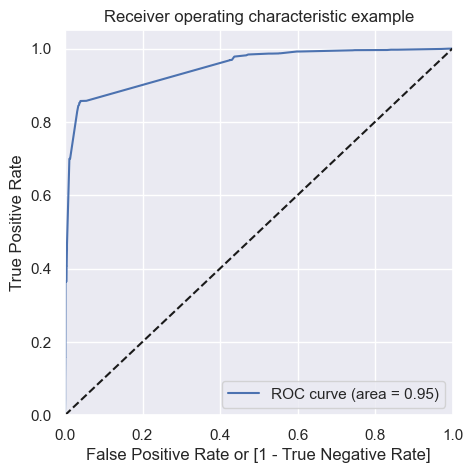

In [125]:
# Plotting the ROC Curve
plot_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [126]:
print("Area under curve: ", round(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob),3),"%")

Area under curve:  0.949 %


The area under the curve (AUC) is around 0.95, closely approaching the ideal AUC of 1.

### Finding Optimal Cutoff Point

The optimal cutoff probability is where we achieve a balance between sensitivity and specificity.

In [127]:
# To create columns with different probability cutoffs 
numbers = [0.0, 0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [128]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
numbers = [0.0, 0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ]

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = np.sum(cm1)
    
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.706503     0.981194     0.534443
0.2   0.2  0.911195     0.857318     0.944942
0.3   0.3  0.919383     0.856909     0.958515
0.4   0.4  0.920170     0.856092     0.960307
0.5   0.5  0.919540     0.854047     0.960563
0.6   0.6  0.920170     0.851594     0.963124
0.7   0.7  0.918753     0.843827     0.965685
0.8   0.8  0.876397     0.700327     0.986684
0.9   0.9  0.790742     0.464841     0.994878


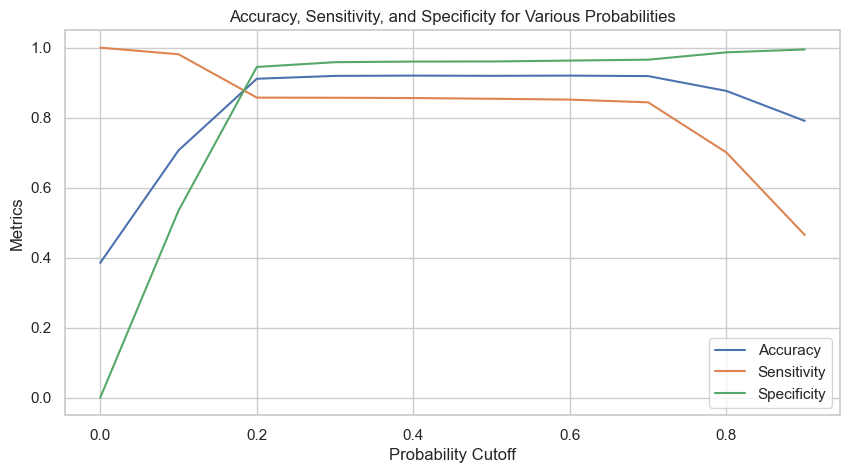

In [129]:
# To plot accuracy, sensitivity, and specificity for various probabilities
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')  # Set style to whitegrid with grid lines
plt.plot(cutoff_df['prob'], cutoff_df[['accuracy', 'sensitivity', 'specificity']])
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Accuracy, Sensitivity, and Specificity for Various Probabilities')
plt.grid(True)  # Add grid lines
plt.show()


Looking at the curve, the **optimal cutoff probability appears to be 0.2**.

In [130]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
# Confusion matrix and Overall Accuracy
confusion1 = get_confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3750  155]
 [ 352 2094]]
Training Accuracy: 0.9201700519603212


In [132]:
confusion1[0]

array([[3750,  155],
       [ 352, 2094]], dtype=int64)

In [133]:
!pip install mlxtend

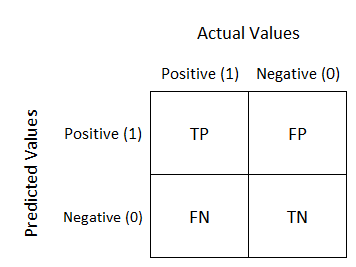

In [134]:
from IPython.display import Image, display

display(Image(filename='./confusion matrix.png'))


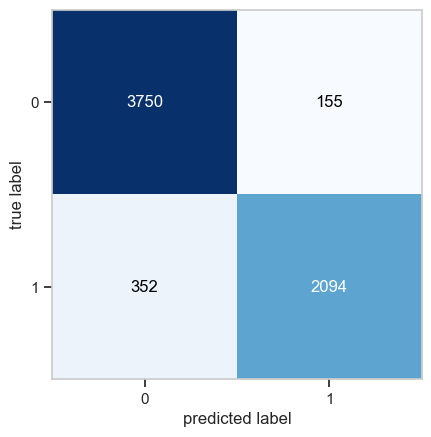

In [135]:
# ploting confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion1[0])
plt.show()

In [136]:
calculate_other_metrics(confusion1[0])

Sensitivity: 0.86 %
Specificity: 0.96 %
False positive rate - predicting the lead conversion when the lead does not convert: 0.04 %
PPV: 0.93 %
NPV: 0.91 %


In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3905
           1       0.93      0.86      0.89      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.91      0.91      6351
weighted avg       0.92      0.92      0.92      6351



### Calculating Pricision and Recall

- Precision = True Positive / ( True Positive + False Positive )

- Recall = True Positive / ( True Positive + False Negative )

In [138]:
matrix = confusion1[0]
matrix

array([[3750,  155],
       [ 352, 2094]], dtype=int64)

In [139]:
# claculate Precision

Precision = matrix[1,1] / ( matrix[1,1] + matrix[0,1])
round(Precision,2)

0.93

In [140]:
# claculate Recall

Recall = matrix[1,1] / ( matrix[1,1] + matrix[1,0])
round(Recall,2)

0.86

In [141]:
# lets use sklearn utilities to find Precision and Recall

from sklearn.metrics import precision_score, recall_score


Precision_sk = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('precision : ',round(Precision_sk,2),'%')
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Recall : ', round(recall,2),'%')                      

precision :  0.93 %
Recall :  0.85 %


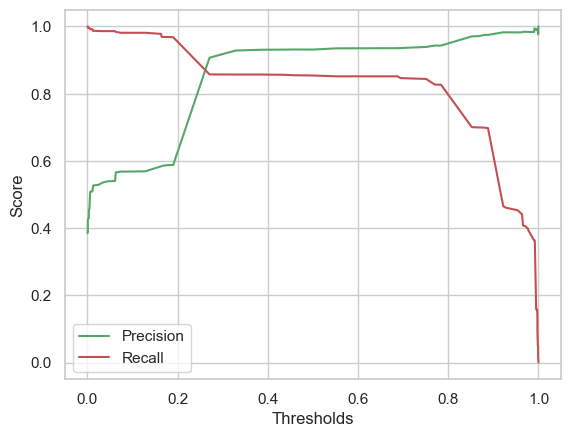

In [142]:
# let find the precision and recall by ploting precision-recall-curve

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plot precision vs recall for different thresholds with green and red lines
plt.plot(thresholds, precision[:-1], "g-", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")

# Add labels and legend
plt.xlabel("Thresholds")
plt.ylabel("Score")
plt.legend()

# Show the plot
plt.show()

Looking at the Precision-Recall curve, the optimal cutoff probability is around **0.25**. This threshold provides a balanced trade-off between precision and recall, and we can assess accuracy using this cutoff as well.

In [143]:
# Using threshold as 0.25 for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [144]:
# now lets create a confusion matrix 

confusion2 = get_confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3690  215]
 [ 349 2097]]
Training Accuracy: 0.911195087387813


In [145]:
# Other metrics
calculate_other_metrics(confusion2[0])

Sensitivity: 0.86 %
Specificity: 0.94 %
False positive rate - predicting the lead conversion when the lead does not convert: 0.06 %
PPV: 0.91 %
NPV: 0.91 %


# Step 6: Predictions on the Test Set

In [146]:
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [147]:
# Transform Feature on Test set

X_test[num_col] = scaler.fit_transform(X_test[num_col])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.304501,-0.591008,0.998931,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [148]:
sel_col3

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [149]:
# selecting the features used in the final model
sel_X_test = X_test[sel_col3]
sel_X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,1,0,1,0,0


In [150]:
# adding a constant  
X_test_sm = sm.add_constant(sel_X_test)
X_test_sm.head()

,const,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,1.0,0,0,0,0,0,0,0,1,0,1,0,0
1490,1.0,0,0,0,0,0,0,0,1,0,0,0,0
7936,1.0,0,0,0,0,0,0,0,1,0,1,0,0
4216,1.0,0,1,0,0,1,0,0,0,0,0,0,0
3830,1.0,0,0,0,0,0,0,0,1,0,1,0,0


In [151]:
mod_4

In [152]:
# predictions

y_test_pred = mod_4.predict(X_test_sm)

y_test_pred[:10]

3271    0.189946
1490    0.888099
7936    0.189946
4216    0.999300
3830    0.189946
1800    0.888099
6507    0.010841
4821    0.000376
4223    0.997563
4714    0.189946
dtype: float64

In [153]:
# converting y_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.reset_index(drop=True, inplace=True)
y_pred_1.head()

y_pred_1.rename(columns={ 0 : 'Converted_prob'},inplace=True)
y_pred_1.head()

,Converted_prob
0,0.189946
1,0.888099
2,0.189946
3,0.999300
4,0.189946


In [154]:
# convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# asigning index as Lead ID 
y_test_df['Lead ID'] = y_test_df.index

In [155]:
y_test_df.reset_index(drop=True, inplace=True)
y_test_df

,Converted,Lead ID
0,0,3271
1,1,1490
2,0,7936
3,1,4216
4,0,3830
...,...,...
2718,0,850
2719,0,2879
2720,1,6501
2721,0,7155


In [156]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [157]:
# Using threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.189946,0
1,1,1490,0.888099,1
2,0,7936,0.189946,0
3,1,4216,0.999300,1
4,0,3830,0.189946,0


In [158]:
area_under_curve =  metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob)
print("Area under curve: ",round(area_under_curve,2),'%')


Area under curve:  0.94 %


In [159]:
# Confusion matrix and overall accuracy
test_confusion = get_confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1640   94]
 [ 157  832]]
Training Accuracy: 0.9078222548659567


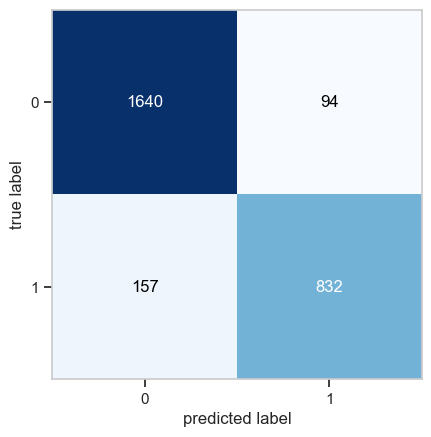

In [160]:
plot_confusion_matrix(conf_mat=test_confusion[0])
plt.show()

In [161]:
calculate_other_metrics(test_confusion[0])

Sensitivity: 0.84 %
Specificity: 0.95 %
False positive rate - predicting the lead conversion when the lead does not convert: 0.05 %
PPV: 0.9 %
NPV: 0.91 %


In [162]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1734
           1       0.90      0.84      0.87       989

    accuracy                           0.91      2723
   macro avg       0.91      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



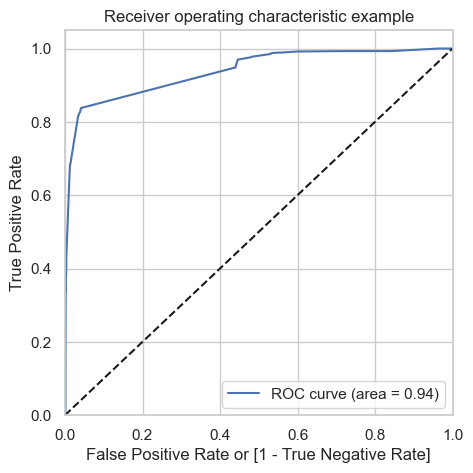

In [163]:
# Plotting the ROC Curve
plot_roc_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

## Using PCA for Model Building 


In our initial model, we employed RFE for feature elimination and manually discarded insignificant features. Another approach is to explore the use of PCA (Principal Component Analysis) to reduce features by identifying principal components.

In [164]:
# Improting PCA Packages

from sklearn.decomposition import PCA

pc_analysis = PCA(svd_solver='randomized', random_state=42)

In [165]:
pc_analysis

PCA(random_state=42, svd_solver='randomized')

In [166]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [167]:
# PCA on train data
pc_analysis.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [168]:
pc_analysis.explained_variance_ratio_

array([3.00502639e-01, 1.06851284e-01, 7.67667499e-02, 5.95942240e-02,
       4.73452821e-02, 3.95002657e-02, 3.31725292e-02, 3.07850240e-02,
       2.76346423e-02, 1.78211690e-02, 1.48531301e-02, 1.42205681e-02,
       1.31864401e-02, 1.30602926e-02, 1.22197851e-02, 1.18975449e-02,
       1.02538850e-02, 9.91049249e-03, 9.31975778e-03, 9.21952100e-03,
       8.79211828e-03, 8.15391563e-03, 7.23170870e-03, 6.79347371e-03,
       6.72777906e-03, 6.04041250e-03, 5.94982758e-03, 5.59961777e-03,
       5.23991112e-03, 5.03314827e-03, 4.34140587e-03, 4.13188819e-03,
       3.88455175e-03, 3.70227905e-03, 3.31561459e-03, 3.05641963e-03,
       2.93101815e-03, 2.85175949e-03, 2.75100062e-03, 2.65408205e-03,
       2.55993983e-03, 2.47627028e-03, 2.36040332e-03, 2.24197944e-03,
       2.13419090e-03, 1.88626314e-03, 1.87648780e-03, 1.81103750e-03,
       1.68614183e-03, 1.60029981e-03, 1.57000755e-03, 1.56089430e-03,
       1.54602139e-03, 1.46195987e-03, 1.36449040e-03, 1.24351901e-03,
      

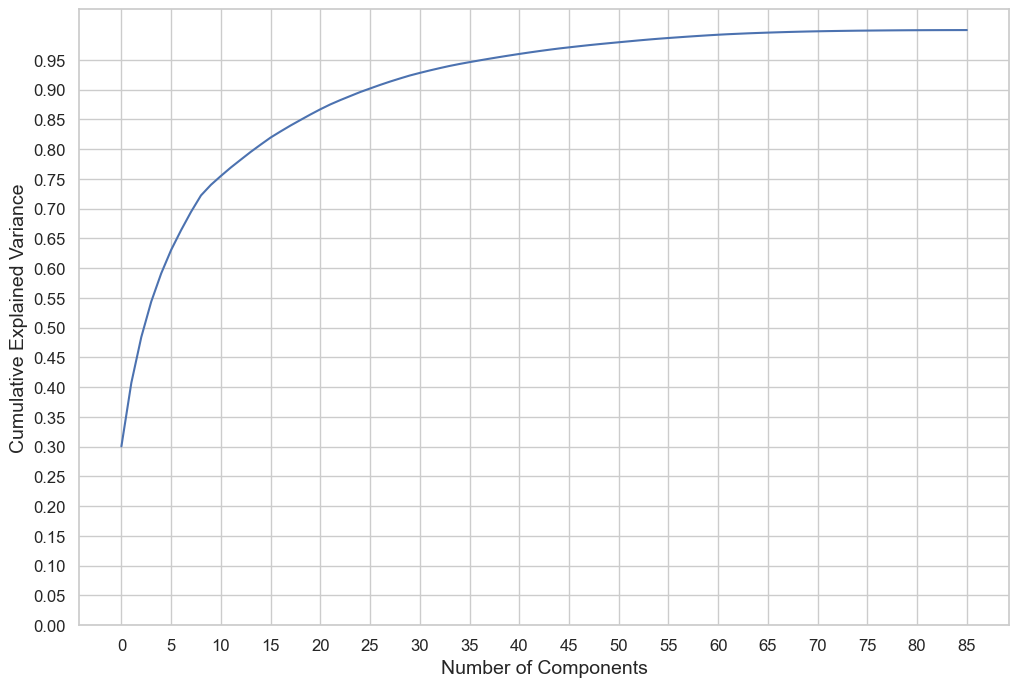

In [169]:
# Exploring Principal Components: Scree Plot

fig = plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.plot(np.cumsum(pc_analysis.explained_variance_ratio_))
plt.xlabel('Number of Components', size=14)
plt.ylabel('Cumulative Explained Variance', size=14)
plt.xticks(np.arange(0, 90, step=5), size=12)
plt.yticks(np.arange(0.0, 1.0, step=0.05), size=12)
plt.show()
sns.set_style('white')  # Resetting the style


It appears that 25 components sufficiently capture 90% of the dataset's variance. We will select these 25 components for our modeling.

In [170]:
# incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA

pc_analysis_final = IncrementalPCA(n_components=25)
pc_analysis_final

IncrementalPCA(n_components=25)

In [171]:
# To get principal components of the train data
df_train_pc_analysis = pc_analysis_final.fit_transform(X_train)
df_train_pc_analysis.shape

(6351, 25)

In [172]:
corrmatrix = np.corrcoef(df_train_pc_analysis.transpose())

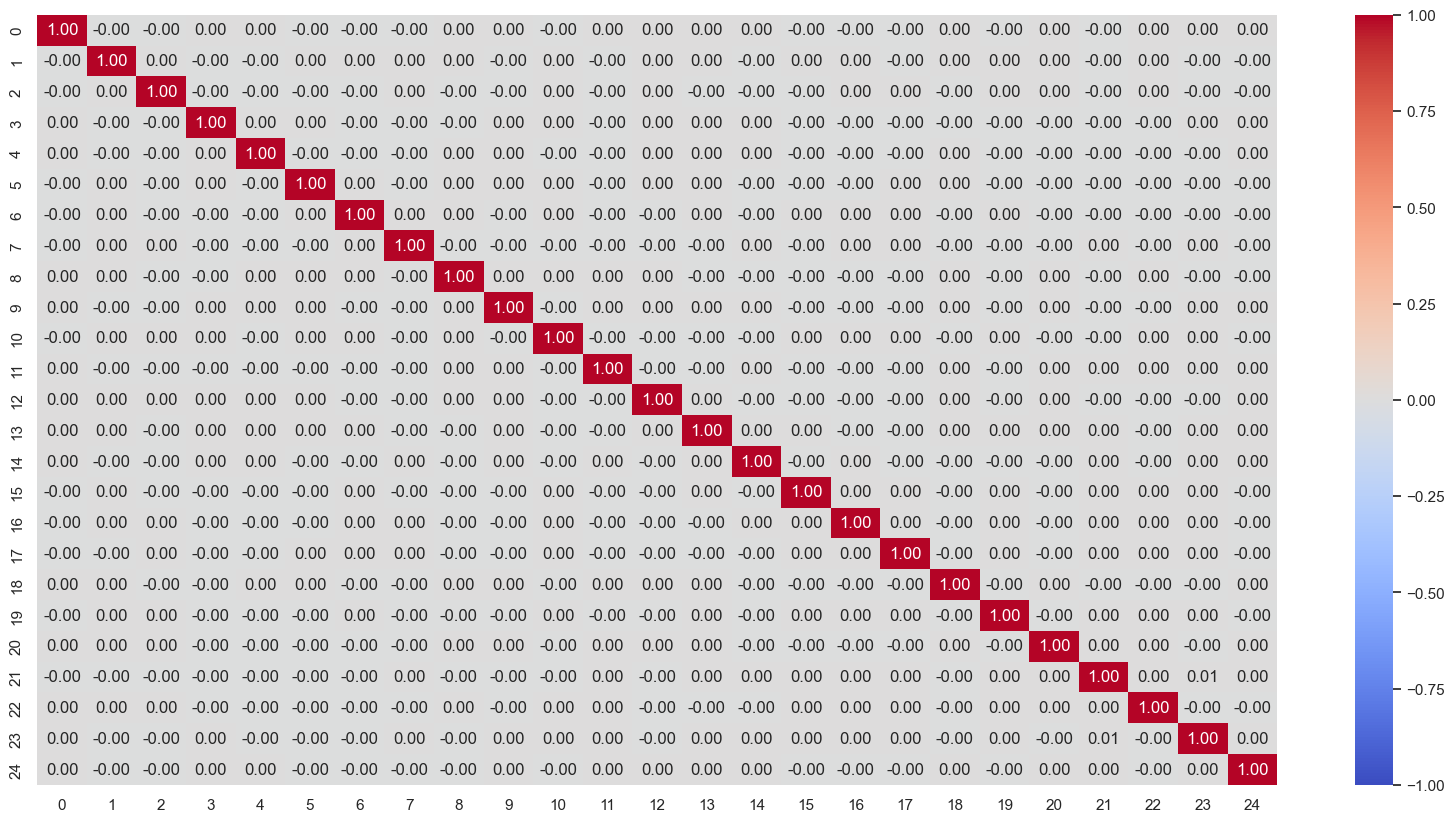

In [173]:
# To visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corrmatrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

As anticipated, there is minimal correlation among the principal components.

In [174]:
# applying selected components to the test data
df_test_pc_analysis = pc_analysis_final.transform(X_test)
df_test_pc_analysis.shape

(2723, 25)

In [175]:
### Utilizing Logistic Regression on Principal Components

In [176]:

# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pc_analysis = LogisticRegression()
model_pc_analysis = learner_pc_analysis.fit(df_train_pc_analysis, y_train)

In [177]:
model_pc_analysis

LogisticRegression()

In [178]:
### Making Predictions

In [179]:
# On Train data

pred_probs_train = model_pc_analysis.predict_proba(df_train_pc_analysis)[:,1]
print("Area under curve for Train data: ", round(metrics.roc_auc_score(y_train, pred_probs_train),2),'%')

Area under curve for Train data:  0.94 %


In [180]:
# On test data

pred_probs_test = model_pc_analysis.predict_proba(df_test_pc_analysis)[:,1]
print("Area under curve for Test data: ", round(metrics.roc_auc_score(y_test, pred_probs_test),2),'%')


Area under curve for Test data:  0.93 %


After comparing both models, the first one utilizing **`RFE`** and **`manual feature elimination`** outperforms the model built with **`PCA`**.

In **`PCA`**, interpreting the impact of conversion is less direct, and independent variables are less interpretable.
When evaluating metrics, both models are comparable, and the first model even outperforms the PCA model. The area under the curve is closer to 1.00 for both training and testing data when using the first model.
Additionally, to explain 90% of the variance, 25 principal components are required. Explaining more variance would necessitate more variables, using a large number of components unnecessarily.


**Results for the first model**:

- Train AUC: 0.9488
- Test AUC: 0.9388

**Results for the PCA model**:

- Train AUC: 0.9433
- Test AUC: 0.9280

In conclusion, the first model is deemed superior. Therefore, we will use that model for calculating lead scores.

##  Lead Score Assigning

**`Lead Score`** = 100 x **`ConversionProbability`**


This calculation needs to be performed for all the leads from the original dataset, including both the training and testing sets.

In [181]:
# test set
leads_test_predicted = y_pred_final.copy()
leads_test_predicted.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.189946,0
1,1,1490,0.888099,1
2,0,7936,0.189946,0
3,1,4216,0.999300,1
4,0,3830,0.189946,0


In [182]:
# train set
leads_train_predicted = y_train_pred_final.copy()
leads_train_predicted.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [183]:
# To drop unnecessary columns from train set
leads_train_predicted = leads_train_predicted[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_predicted.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.189946,0
1,1012,0,0.061006,0
2,9226,0,0.000707,0
3,4750,1,0.784007,1
4,7987,1,0.977108,1


In [184]:
# To concatenate 2 datasets
lead_full_predicted = leads_train_predicted.append(leads_test_predicted)
lead_full_predicted.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.189946,0
1,1012,0,0.061006,0
2,9226,0,0.000707,0
3,4750,1,0.784007,1
4,7987,1,0.977108,1


In [185]:
# Inspect the shape of the final dataset
print(leads_train_predicted.shape)
print(leads_test_predicted.shape)
print(lead_full_predicted.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [186]:
# to get uniqueness of Lead IDs
len(lead_full_predicted['Lead ID'].unique().tolist())

9074

In [187]:
lead_full_predicted['Lead_Score'] = lead_full_predicted['Converted_prob'].apply(lambda x : round(x*100))
lead_full_predicted.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.189946,0,19
1,1012,0,0.061006,0,6
2,9226,0,0.000707,0,0
3,4750,1,0.784007,1,78
4,7987,1,0.977108,1,98


In [188]:
lead_full_predicted = lead_full_predicted.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_predicted.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.127953,0,13
1,0,0.000707,0,0
2,1,0.888099,1,89
3,0,0.000707,0,0
4,1,0.888099,1,89


In [189]:
# To get Lead Number column from original data
df_leads_original = Initial_leads[['Lead Number']]
df_leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [190]:
# concatenate the both dataframes based on index

leads_with_score = pd.concat([df_leads_original, lead_full_predicted], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.0,0.127953,0.0,13.0
1,660728,0.0,0.000707,0.0,0.0
2,660727,1.0,0.888099,1.0,89.0
3,660719,0.0,0.000707,0.0,0.0
4,660681,1.0,0.888099,1.0,89.0


We now possess a new dataframe containing Lead Numbers and their respective Lead Scores, facilitating straightforward cross-referencing with the original dataset.

## Identifying Key Features

In [191]:
# Displaying features with corresponding coefficients in the final model

pd.options.display.float_format = '{:.2f}'.format
final_model_coefficients = mod_4.params[1:]
final_model_coefficients

Do Not Email                               -1.28
Lead Origin_Lead Add Form                   1.20
Lead Source_Welingak Website                3.28
Tags_Busy                                   3.80
Tags_Closed by Horizzon                     7.98
Tags_Lost to EINS                           9.19
Tags_Ringing                               -1.81
Tags_Will revert after reading the email    3.99
Tags_switched off                          -2.45
Lead Quality_Not Sure                      -3.52
Lead Quality_Worst                         -3.91
Last Notable Activity_SMS Sent              2.74
dtype: float64

In [192]:
# Relative feature importance
importance_feature = final_model_coefficients
importance_feature = 100.0 * (importance_feature / importance_feature.max())
importance_feature.sort_values(ascending=False)

Tags_Lost to EINS                          100.00
Tags_Closed by Horizzon                     86.78
Tags_Will revert after reading the email    43.40
Tags_Busy                                   41.37
Lead Source_Welingak Website                35.70
Last Notable Activity_SMS Sent              29.79
Lead Origin_Lead Add Form                   13.09
Do Not Email                               -13.96
Tags_Ringing                               -19.71
Tags_switched off                          -26.60
Lead Quality_Not Sure                      -38.30
Lead Quality_Worst                         -42.53
dtype: float64

In [193]:
# sort the features based on importance
sorted_index = np.argsort(importance_feature, kind='quicksort', order='list of str')
sorted_index.sort_values(ascending=True)

Tags_Closed by Horizzon                      0
Tags_Lost to EINS                            1
Tags_Will revert after reading the email     2
Tags_switched off                            3
Lead Quality_Worst                           4
Last Notable Activity_SMS Sent               5
Tags_Busy                                    6
Lead Quality_Not Sure                        7
Lead Source_Welingak Website                 8
Lead Origin_Lead Add Form                    9
Do Not Email                                10
Tags_Ringing                                11
dtype: int64

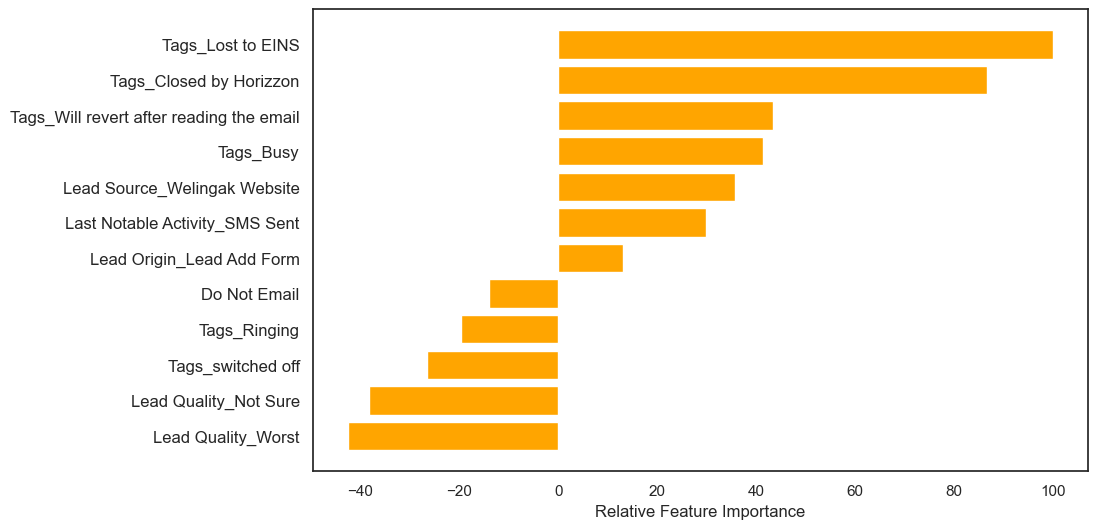

In [194]:
# To plot features with their relative importance
fig, ax = plt.subplots(figsize=(10, 6))
pos = np.arange(sorted_index.shape[0])
ax.barh(pos, importance_feature[sorted_index], color='orange')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[sel_col3].columns)[sorted_index], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12)
plt.show()

# Conclusion

After exploring various models, our final model exhibits the following key characteristics:

1. All p-values are close to zero, indicating strong statistical significance for the chosen features.

2. VIFs for all features are exceptionally low, indicating minimal multicollinearity.

3. The overall testing accuracy is impressive, with an accuracy of **90.78%** at a probability threshold of 0.05.

**Model Performance Metrics**:

| Dataset | Accuracy | Sensitivity | Specificity | False Positive Rate | Positive Predictive Value | Negative Predictive Value | AUC     |
|---------|----------|-------------|-------------|----------------------|---------------------------|---------------------------|---------|
| **Train**   | 0.92   | 0.86      | 0.95      | 0.06               | 0.91                    | 0.91                    | 0.95  |
| **Test**    | 0.90   | 0.84      | 0.95      | 0.05               | 0.90                    | 0.91                    | 0.94  |


<br/>

The **`optimal threshold`** for the model is identified as **0.20**, determined based on a tradeoff between sensitivity, specificity, and accuracy. This threshold can be adjusted according to business requirements to emphasize specific metrics.

**Key Features Impacting Conversion Probability**:

- Features with **`Positive Coefficient`** Values (in **`decreasing order`** of impact):
	1. Tags_Lost to EINS
	2. Tags_Closed by Horizzon
	3. Tags_Will revert after reading the email
	4. Tags_Busy
	5. Lead Source_Welingak Website
	6. Last Notable Activity_SMS Sent
	7. Lead Origin_Lead Add Form

<br/>

- Features with **`Negative Coefficient`** Values (in **`decreasing order`** of impact):
	1. Lead Quality_Worst
	2. Lead Quality_Not Sure
	3. Tags_switched off
	4. Tags_Ringing
	5. Do Not Email